# Sensor Selection for the Brain

This notebook analyzes the EEG and neural imaging data.

# Sweeney et al.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv('data/mouse_fed_fasted_refed.csv', header=None)
df.columns = ['Time'] + [i for i in range(1,21)]
df.index = df['Time']
df = df.drop(['Time'], axis=1)
df

1          2         3          4         5          6  \
Time                                                                           
0.000000      -54.58729 -175.35650 -99.68904   87.92104 -247.1337   24.66688   
0.400244      -26.76279 -100.22380 -87.96155  110.44870 -190.5039   49.88474   
0.800488      -24.50926 -100.82260 -85.06435  115.01800 -187.3210   52.51804   
1.200732      -23.25702 -101.09150 -88.07812  131.15460 -191.2860   54.43416   
1.600976      -25.51404 -100.38450 -87.96191  153.09090 -187.8909   54.54893   
...                 ...        ...       ...        ...       ...        ...   
178299.026488 -31.22991  -39.58768 -79.18064  -65.62574 -112.9788 -108.70100   
178299.426732 -31.91146  -43.45766 -79.14503  -71.01103 -113.2910 -110.80820   
178299.826976 -31.03753  -43.85853 -77.35460  -72.04176 -115.0340 -108.03330   
178300.227220 -31.29086  -46.38462 -77.82590  -74.57180 -118.8827 -107.67630   
178300.627464 -34.28661  -45.21123 -77.09238  -73.80774 -116.2135 -108.17980   

                       7          8          9         10         11  \
Time                                                                   
0.000000      -142.63090  -81.47639  -93.66202  -70.62798  114.77660   
0.400244      -144.63870 -109.96040  -72.60765  -54.51271   97.62627   
0.800488      -145.46640 -107.89590  -66.04562  -53.69259  105.91440   
1.200732      -147.24800 -111.41220  -61.74156  -41.77512  102.44170   
1.600976      -147.92100 -105.05040  -57.28197  -37.09034  106.89910   
...                  ...        ...        ...        ...        ...   
178299.026488  -63.30272  -41.81321 -126.33280 -161.15050  -76.99055   
178299.426732  -62.56382  -43.08181 -130.68240 -160.86730  -76.38684   
178299.826976  -65.38165  -42.62396 -131.04850 -162.41970  -77.71354   
178300.227220  -68.94688  -49.55189 -138.01150 -164.13120  -80.68343   
178300.627464  -66.16210  -49.10834 -140.24580 -164.25650  -79.40901   

                      12         13         14         15        16  \
Time                                                                  
0.000000      -120.74840 -49.682350  -86.01218   39.90479 -128.8320   
0.400244      -117.77580  -0.872650 -115.18150   74.18243 -125.7675   
0.800488      -117.37080  -6.673911 -114.41060   87.75423 -124.3733   
1.200732      -116.22430 -11.956020 -113.34410   99.51522 -125.7053   
1.600976      -116.24220 -15.200140 -117.37930  109.65140 -123.6776   
...                  ...        ...        ...        ...       ...   
178299.026488  -67.94252  13.968030  -97.15159  -96.46923 -128.0581   
178299.426732  -70.37642  14.560820 -100.51270  -98.22587 -128.4495   
178299.826976  -72.69083  11.846390 -104.62250  -96.02318 -126.3134   
178300.227220  -75.10869  12.271420 -106.67480  -94.97768 -127.5582   
178300.627464  -74.81960  11.779430 -111.80760  -98.34807 -127.0338   

                      17          18         19        20  
Time                                                       
0.000000       -53.26616 -228.718900  -88.98537 -37.82751  
0.400244       -41.93726 -206.534400 -100.59960 -22.48582  
0.800488       -42.39120 -191.707300 -102.31180 -19.67991  
1.200732       -38.81125 -193.976700 -105.95140 -16.37059  
1.600976       -37.73336 -197.743400 -106.16400 -16.02748  
...                  ...         ...        ...       ...  
178299.026488 -189.52550   -5.539936   27.19230 -84.04462  
178299.426732 -189.23960  -12.404940   25.76511 -82.80156  
178299.826976 -189.89940  -20.201690   27.47370 -84.88051  
178300.227220 -189.75380  -25.835490   27.89225 -84.62664  
178300.627464 -192.38060  -30.705540   26.86742 -88.28110  

[4524 rows x 20 columns]

In [3]:
# The appropriate place to splie the above dataframe by
# phase of the cell cycle comes from the original code in
# the paper by Sweeny & Chen et al. 
df_fed   = df.iloc[:1508,:]
df_fast  = df.iloc[1509:3017,:]
df_refed = df.iloc[3017:,:]

In [4]:
# The positions of the neurons are taken from the codes in
# Controllability of Hypergraphs by Can Chen et al.
# these are presumably based on the locations of the neruons
# within the movies from the Sweeny & Chen et al. paper, but
# I have not seen the code to identify these positions from data
positions = [
    (110,36),
    (13,78) ,
    (96,58) ,
    (85,102),
    (42,22) ,
    (47,34) ,
    (53,67) ,
    (85,89) ,
    (78,42) ,
    (53,2)  ,
    (62,23) ,
    (58,79) ,
    (52,79) ,
    (71,88) ,
    (80,52) ,
    (117,32),
    (41,117),
    (88,18) ,
    (118,27),
    (84,20) ,
]
df_neurons = pd.DataFrame(positions, columns=['x', 'y'])

## Observed Output Energy

In [5]:
df_neurons['Fed OOE']   = np.sum(df_fed.values ** 2, axis=0)
df_neurons['Fast OOE']  = np.sum(df_fast.values ** 2, axis=0)
df_neurons['Refed OOE'] = np.sum(df_refed.values ** 2, axis=0)

columns_to_normalize = ['Fed OOE', 'Fast OOE', 'Refed OOE']
df_neurons[columns_to_normalize] = df_neurons[columns_to_normalize].div(df_neurons[columns_to_normalize].sum(axis=0), axis=1)
df_neurons

x    y   Fed OOE  Fast OOE  Refed OOE
0   110   36  0.059979  0.003732   0.010417
1    13   78  0.006913  0.029131   0.180783
2    96   58  0.031107  0.025044   0.037110
3    85  102  0.036590  0.032773   0.020185
4    42   22  0.275034  0.210778   0.156432
5    47   34  0.049017  0.000693   0.059045
6    53   67  0.081696  0.101549   0.017253
7    85   89  0.015744  0.012175   0.010502
8    78   42  0.048984  0.066706   0.042863
9    53    2  0.147641  0.110372   0.065322
10   62   23  0.007918  0.023070   0.014691
11   58   79  0.031623  0.072301   0.018943
12   52   79  0.007567  0.012257   0.044276
13   71   88  0.052202  0.075248   0.056628
14   80   52  0.029148  0.058649   0.070693
15  117   32  0.026070  0.013779   0.026732
16   41  117  0.028068  0.027571   0.039020
17   88   18  0.047870  0.072533   0.078965
18  118   27  0.009804  0.040399   0.013066
19   84   20  0.007025  0.011241   0.037076

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from mpl_sankey import sankey

# Assume df_neurons contains 'Fed OOE', 'Fast OOE', 'Refed OOE' columns
# Step 1: Rank each condition
df_ranks = pd.DataFrame([1 for i in range(df_neurons.shape[0])], columns=['weight'])
df_ranks['Fed'] = df_neurons['Fed OOE'].rank(ascending=False).astype(int)
df_ranks['Fast'] = df_neurons['Fast OOE'].rank(ascending=False).astype(int)
df_ranks['Refed'] = df_neurons['Refed OOE'].rank(ascending=False).astype(int)

df_ranks

weight  Fed  Fast  Refed
0        1    4    19     20
1        1   20    11      1
2        1   11    13     11
3        1    9    10     14
4        1    1     1      2
5        1    6    20      6
6        1    3     3     16
7        1   15    17     19
8        1    7     7      9
9        1    2     2      5
10       1   17    14     17
11       1   10     6     15
12       1   18    16      8
13       1    5     4      7
14       1   12     8      4
15       1   14    15     13
16       1   13    12     10
17       1    8     5      3
18       1   16     9     18
19       1   19    18     12

phase=0
skip right!
starts.index=Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64', name='  ')
phase=1
starts.index=Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64', name='    ')
look here
look here
look here
look here
look here
look here
look here
look here
look here
look here
look here
look here
look here
look here
look here
look here
look here
look here
look here
look here
starts.index=Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64', name='   ')


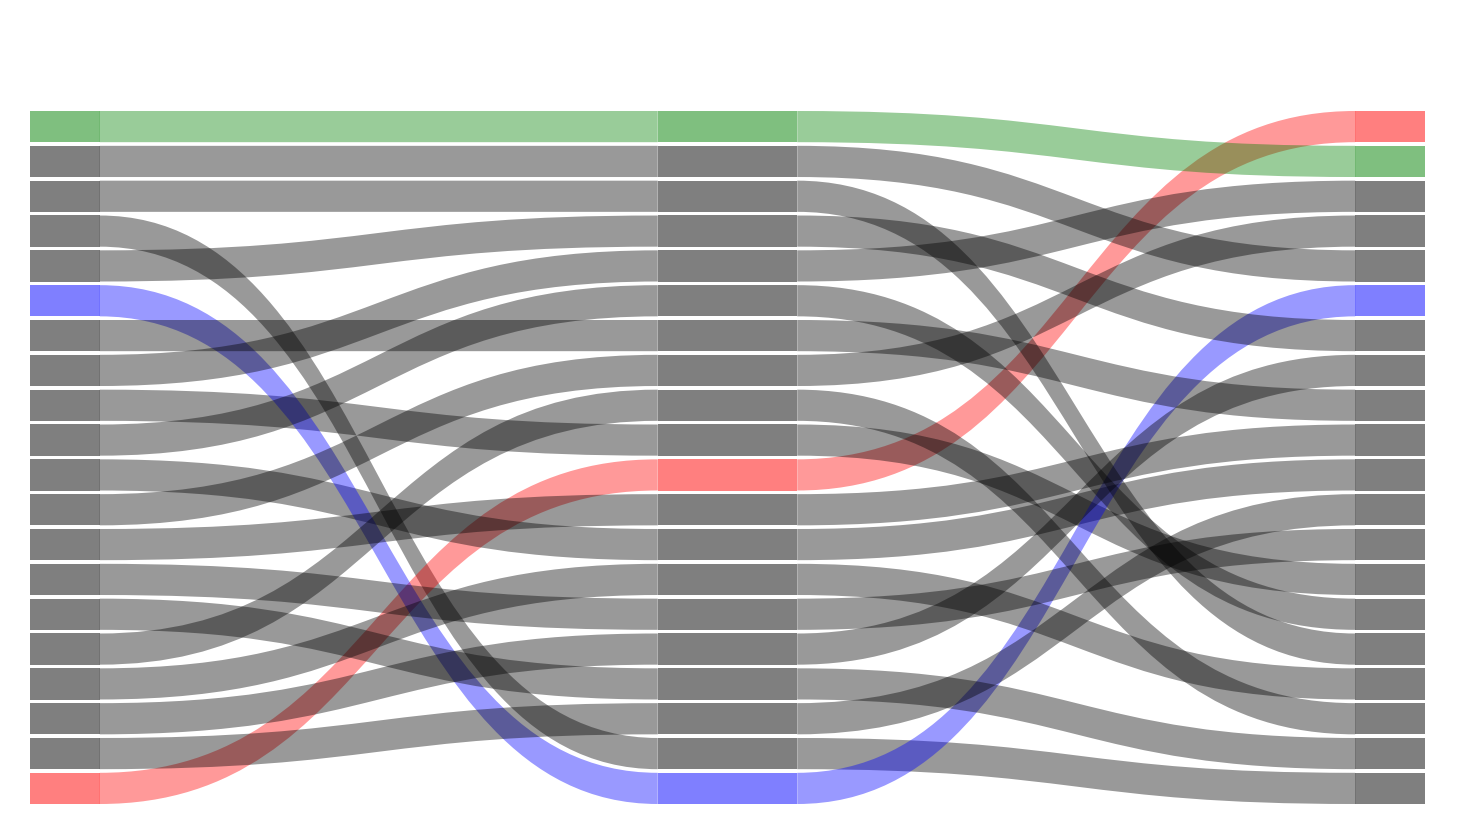

In [9]:
plt.figure(figsize=(6, 3), dpi=300)
cols = [['k' for i in range(21)] for j in range(20)]
# cols[0][1] = 'g'
# cols[1][1] = 'g'
fcols = [['k' for i in range(21)] for j in range(20)]
fcols[0][1] = 'g'
fcols[0][6] = 'b'
fcols[0][20] = 'r'
fcols[1][1] = 'g'
fcols[1][20] = 'b'
fcols[1][11] = 'r'
fcols[2][2] = 'g'
fcols[2][6] = 'b'
fcols[2][1] = 'r'
# print(f"{cols=}")
# print(f"{fcols=}")
df_ranks_p =     df_ranks.copy()
df_ranks_p.columns = [' ', '  ', '   ', '    ']
sankey(
    df_ranks_p,
    labels_color=None,
    cmap=plt.get_cmap('viridis'),
    flow_colors = fcols,
    colors = fcols
)

In [17]:
df_ranks_p

0   1   4  19   20
1   1  20  11    1
2   1  11  13   11
3   1   9  10   14
4   1   1   1    2
5   1   6  20    6
6   1   3   3   16
7   1  15  17   19
8   1   7   7    9
9   1   2   2    5
10  1  17  14   17
11  1  10   6   15
12  1  18  16    8
13  1   5   4    7
14  1  12   8    4
15  1  14  15   13
16  1  13  12   10
17  1   8   5    3
18  1  16   9   18
19  1  19  18   12

1


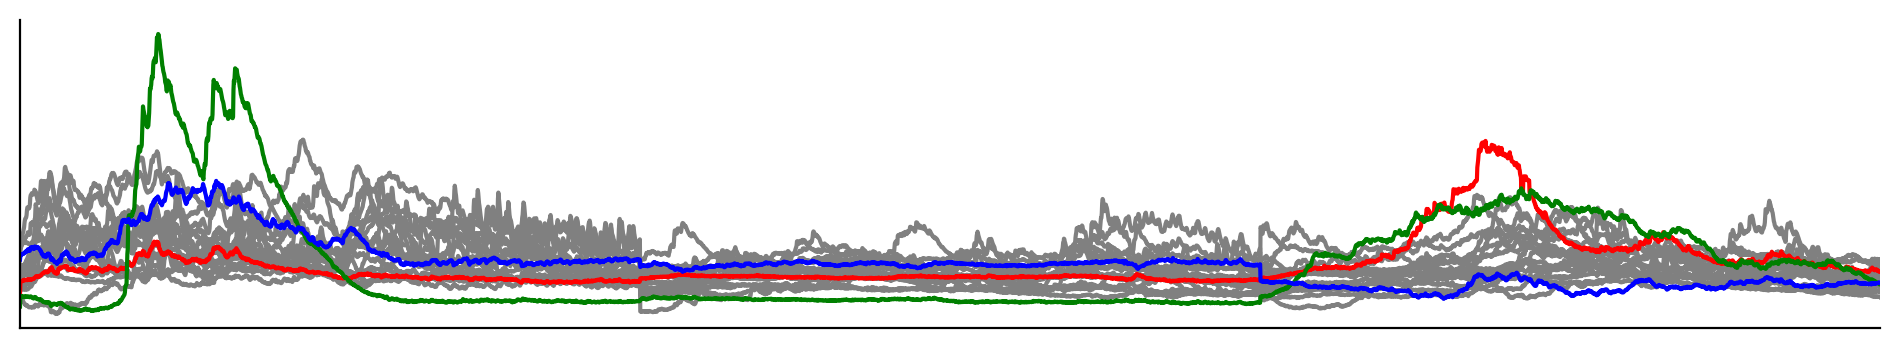

In [24]:
plt.figure(figsize=(12, 2), dpi=200)  # Adjust figsize as needed
full_data = np.concatenate((df_fed.values, df_fast.values, df_refed.values))
for i in range(20):
    col = 'grey'
    zorder = 0
    if i == 4:
        col = 'g'
        zorder = 1
    elif i == 5:
        col = 'b'
        zorder = 1
    elif i == 1:
        col = 'r'
        zorder = 1
        print(i)
    plt.plot(full_data[:,i], color=col, zorder=zorder)
sns.despine()
plt.xlim([0, full_data.shape[0] - 1])
plt.xticks([])
plt.yticks([])
plt.show()

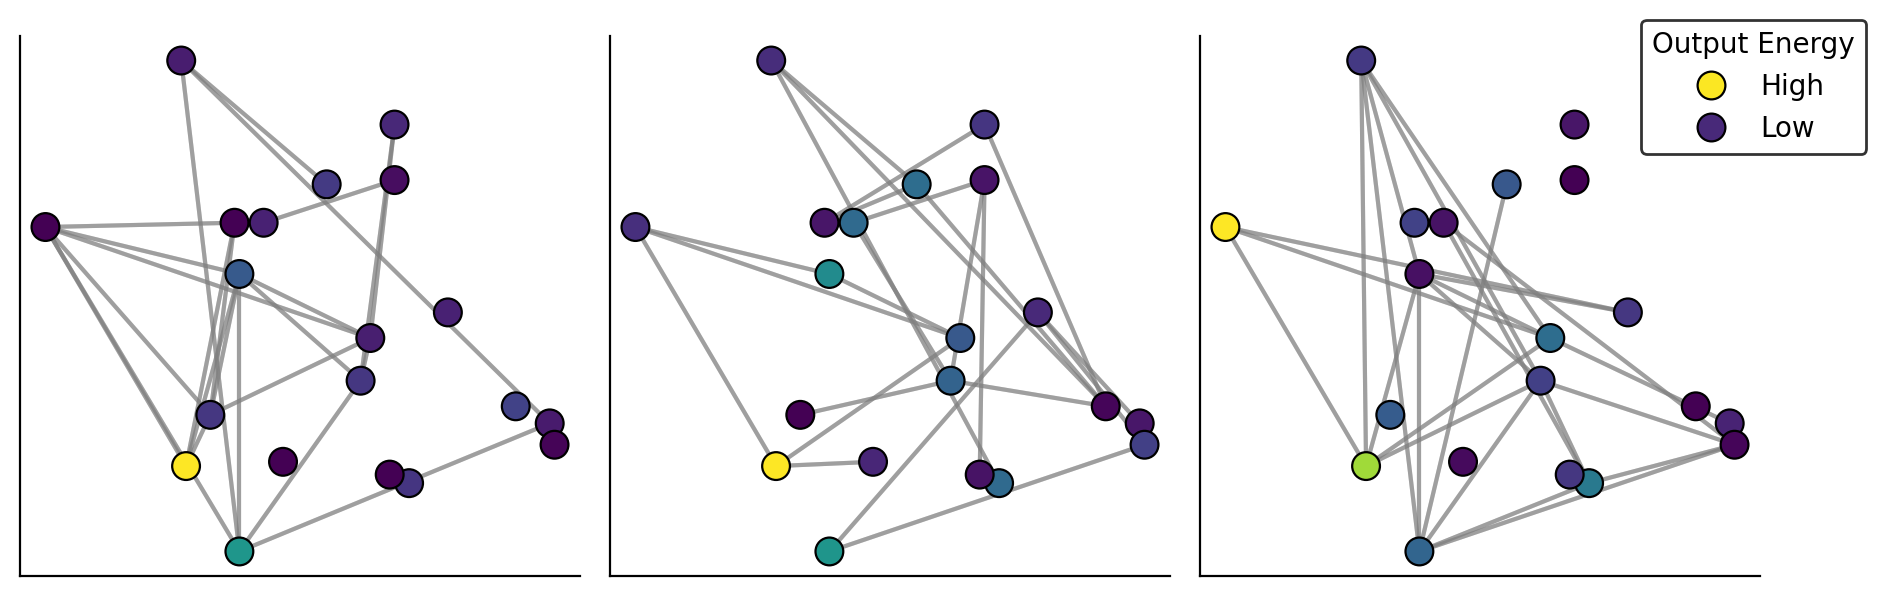

In [11]:
k = 25
k *= 2

phases = ['Fed OOE', 'Fast OOE', 'Refed OOE']
titles = ['Fed', 'Fast', 'Refed']
dfs = [df_fed, df_fast, df_refed]
fig, axs = plt.subplots(1,3, figsize=(9,3), dpi=200)
for p, phase in enumerate(phases):
    scatter = sns.scatterplot(
        data=df_neurons,
        x='x',
        y='y',
        ax=axs[p],
        s=100,
        hue=phase,
        legend=(p == 2),  # Only add legend for the first plot to get handles/labels
        edgecolor='k',
        palette='viridis'
    )

    # Step 1: Calculate the correlation matrix and set the diagonal to zero
    R = np.corrcoef(dfs[p].values.T)
    np.fill_diagonal(R, 0)

    # Step 2: Get indices of the k largest interactions
    # or any other number of top interactions you'd like to visualize
    # Get the indices of the largest elements in the flattened R array
    largest_indices = np.unravel_index(np.argsort(R.ravel())[-k:], R.shape)
    
    # Step 3: Plot edges for the k largest interactions
    # Loop through each pair of indices and plot a line between the corresponding neurons
    for i, j in zip(*largest_indices):
        x_values = [df_neurons.loc[i, 'x'], df_neurons.loc[j, 'x']]
        y_values = [df_neurons.loc[i, 'y'], df_neurons.loc[j, 'y']]
        axs[p].plot(
            x_values,
            y_values,
            color='grey',
            alpha=0.5,
            zorder=-1
        )
#    axs[p].set_title(titles[p])
    axs[p].set_xticks([])
    axs[p].set_yticks([])
    axs[p].set_xlabel('')
    axs[p].set_ylabel('')

axs[2].get_legend().remove()

# Add a shared legend using the first plot's handles and labels
handles, labels = scatter.get_legend_handles_labels()
fig.legend(
    [handles[-1], handles[0]],
    ['High', 'Low'],
    loc='upper right',
    title='Output Energy',
    bbox_to_anchor=(1.05, 1),
    edgecolor='k'
)
sns.despine()

plt.tight_layout()
plt.show()


### Snakey

In [8]:
import numpy as np
import pandas as pd

import matplotlib.patches as patches
from matplotlib import pyplot as plt
from matplotlib.path import Path

from matplotlib.collections import PatchCollection

__version__ = '0.1.0'

# Share of total width left empty (same in each phase):
GAPS = .1

# Location of bounds (if a phase is drawn from 0 to 1).
LEFT = .1
RIGHT = .9

def _draw_flow(start, end, width, left, right, color):
    """
    Draw a single flow, from "left" to "right", with y going from "start" to
    "end", width "width" and color "color".
    """
    space = right - left

    verts = np.zeros(shape=(9, 2), dtype='float')
    verts[:,1] = start
    verts[2:6,1] = end
    verts[4:,1] += width

    verts[:,0] = left
    verts[1:7,0] += space / 2
    verts[3:5,0] += space / 2

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.LINETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CLOSEPOLY
             ]

    path = Path(verts, codes)

    patch = patches.PathPatch(path, facecolor=color, lw=0, alpha=.4)
    plt.gca().add_patch(patch)


def _node_text(start, size, node_sizes):
    if node_sizes is True:
        node_sizes = '{label} ({size})'
    # Allow for formatting specs:
    elif '{label' not in node_sizes:
        size = node_sizes.format(size)
        node_sizes = '{label} {size}'
    return node_sizes.format(label=start, size=size)

def sankey(data, cmap=plt.get_cmap('jet_r'), flows_color=None,
           labels_color='black', titles_color='black', labels_size=20,
           titles_size=20, node_sizes=False, sort_flows_by_nodes=False,
           colors=None, flow_colors=None
          ):
    """
    Draw a sankey diagram.

    Parameters
    ----------

    data : pandas DataFrame, numpy 2-D array, or list of equal length lists
        The data to be represented. Each row describes a flow from the
        beginning to the end. The first column must be numeric and represents
        the (positive) width of the flow. Each other column describes the label
        of the flow at a given stage.
        At least two stages (start, end) are needed to produce a meaningful
        diagram, hence "data" needs to hold three or more columns.

    cmap : colormap, default: 'jet_r'
        Used to assign a color to each block (and to its outgoing flows, unless
        the "flows_color" argument is used).

    flows_color : color, default: None
        Draw all flows of a same color, rather than of the color of each flow's
        starting block.

    labels_color : color or None, default: 'black'
        Color to be used for labels, None to hide them.

    titles_color : color or None, default: 'black'
        Color to be used for titles, None to hide them.

    labels_size : int, default: 20
        Font size for node labels.

    titles_size : int, default: 20
        Font size for titles.

    node_sizes : Boolean or string, default: False
        Whether to show node sizes close to node labels.
        A format string with named placeholders can be passed to control the
        formatting, as in '{label}\n({size}\%)': if only a non-named
        placeholder is present, as in '- {}', the label is prepended separated
        by a space.
        Passing True is equivalent to passing '{label} ({size})' (or '({})').

    sort_flows_by_nodes : Boolean, default: False
        Whether flows from/to a given node should be sorted based on the
        position of the starting and ending nodes - the default is to sort them
        based on their position in the passed data.
    """

    data = pd.DataFrame(data)

    # One column is for the weights, the remaining n+1 limits define n phases:
    phases = data.shape[1] - 2


    all_labels = data.iloc[:, 1:].stack().unique()

    if colors is None:
        colors = dict(zip(all_labels,
                          cmap(np.arange(0, len(all_labels))/len(all_labels))))
    if flow_colors is None:
        flow_colors = colors

    # Actual scale from flow/block width to drawn width:
    factor = (1 - GAPS) / data.iloc[:, 0].sum()

    # The first column always contains weights:
    var_weight = data.columns[0]
    for phase in range(phases):
        print(f"{phase=}")
        # print(f"{type(phase)=}")
        # ... while the columns containing variables shift at each phase:
        var_left = data.columns[phase+1]
        var_right = data.columns[phase+2]

        # Compute total weight for each label:
        l_sizes = data.groupby(var_left)[var_weight].sum()
        r_sizes = data.groupby(var_right)[var_weight].sum()

        # Drop empty cats (https://github.com/pandas-dev/pandas/issues/8559):
        l_sizes, r_sizes = (s.pipe(lambda x : x[x>0]) for s in (l_sizes, r_sizes))

        # Map weights to drawn sizes:
        l_shares = l_sizes * factor
        r_shares = r_sizes * factor

        # Distribute gap space among gaps:
        l_gaps = GAPS / max((len(l_shares) - 1), 1)
        r_gaps = GAPS / max((len(r_shares) - 1), 1)

        # Compute blocks positions, including gaps:
        l_starts = (l_shares + l_gaps).cumsum().shift().fillna(0)
        r_starts = (r_shares + r_gaps).cumsum().shift().fillna(0)

        for (pos, l, w, starts, shares) in (
                           ('right', phase+RIGHT, 1-RIGHT, r_starts, r_shares),
                           ('left', phase, LEFT, l_starts, l_shares)):
            # print(f"{(pos, l, w, starts, shares)=}")
            # print(f"{pos=}")
            if pos == 'right' and phase != phases - 1:
                print('skip right!')
                continue
            if pos == 'right' and phase < phases - 1:
                # Center text for full width:
                text_x = l + w
            elif pos == 'left' and phase:
                # Do not draw text - it will be drawn by next phase:
                text_x = -1
#                continue
            else:
                # Center text for half width (first or last extreme):
                text_x = l + 0.5*w
            print(f"{starts.index=}")
            for idx, start in enumerate(starts.index):
                # Draw blocks:
                bottom = starts.loc[start]
#                pc = PatchCollection([p], facecolor=colors[phase][start], alpha=.5)
                if pos == 'left':
                    p = patches.Rectangle(
                        (l-w, 1 - bottom - shares.loc[start]),
                        2*w,
                        shares.loc[start],
                        fill=False,
                        clip_on=False
                    )
                    pc = PatchCollection([p], facecolor=colors[phase][start], alpha=.5)
                    plt.gca().add_collection(pc)
                elif pos == 'right':
                    print('look here')
                    p = patches.Rectangle(
                        (l, 1 - bottom - shares.loc[start]),
                        w,
                        shares.loc[start],
                        fill=False,
                        clip_on=False
                    )
                    pc = PatchCollection([p], facecolor=colors[phase+1][start], alpha=.5)
                    plt.gca().add_collection(pc)
                    # TO DETERMINE THE COLOR OF THE LEFT HAND SIDE

            # Draw titles:
            if text_x != -1 and titles_color is not None:
                plt.gca().text(text_x,
                               1,
                               var_left if pos == 'left' else var_right,
                               horizontalalignment='center',
                               verticalalignment='bottom',
                               fontsize=titles_size, color=titles_color)

        # Draw flows:
        flows_list = data[[var_weight,
                           var_left,
                           var_right]]
        if sort_flows_by_nodes:
            # Avoid (probably unjustified - we're working on entire columns)
            # SettingWithCopyWarning:
            flows_list = flows_list.copy()
            for a_var, starts in (var_left, l_starts), (var_right, r_starts):
                dtype = pd.CategoricalDtype(categories=starts.index,
                                            ordered=True)
                flows_list[a_var] = flows_list[a_var].astype(dtype)
            flows_list = flows_list.sort_values([var_left, var_right])
        # print(f"{flows_list=}")
        for idx, (weight, start, end) in flows_list.iterrows():
            width = weight * factor
            l = l_starts.loc[start]
            r = r_starts.loc[end]
            #print(f"{idx=}")
            #print(f"{phase=}")
            _draw_flow(1 - l_starts.loc[start] - width,
                       1 - r_starts.loc[end] - width, width,
                       phase + LEFT, phase + RIGHT,
                       flows_color or flow_colors[phase][start])
            l_starts.loc[start] += width
            r_starts.loc[end] += width

    plt.xlim(0, phases)
    plt.axis('off')

## Build Models

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
from scipy.linalg import eigh
# from scipy.linalg import solve_continuous_lyapunov
from scr import Model


In [93]:
df_fed   = df.iloc[:1508,:]
df_fast  = df.iloc[1509:3017,:]
df_refed = df.iloc[3017:,:]

In [94]:
states = [i for i in range(1,21)]
states

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [95]:
# states = pd.DataFrame({'State': df_fed.columns})
# states.index = states['State']

In [96]:
LTI1 = Model.LinearTimeInvariant(data=df_fed.values.T[:,:, np.newaxis], dmdRank=5, states=states)
LTI2 = Model.LinearTimeInvariant(data=df_fast.values.T[:,:, np.newaxis], dmdRank=5, states=states)
LTI3 = Model.LinearTimeInvariant(data=df_refed.values.T[:,:, np.newaxis], dmdRank=5, states=states)

LTI1.setMeasurments([2])
LTI2.setMeasurments([2])
LTI3.setMeasurments([2])

 /home/jpic/.local/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning:Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.


### Visualize Dynamics

 /tmp/ipykernel_1217759/3476791084.py:8: RuntimeWarning:invalid value encountered in log10
 /tmp/ipykernel_1217759/3476791084.py:11: RuntimeWarning:invalid value encountered in log10
 /tmp/ipykernel_1217759/3476791084.py:14: RuntimeWarning:invalid value encountered in log10


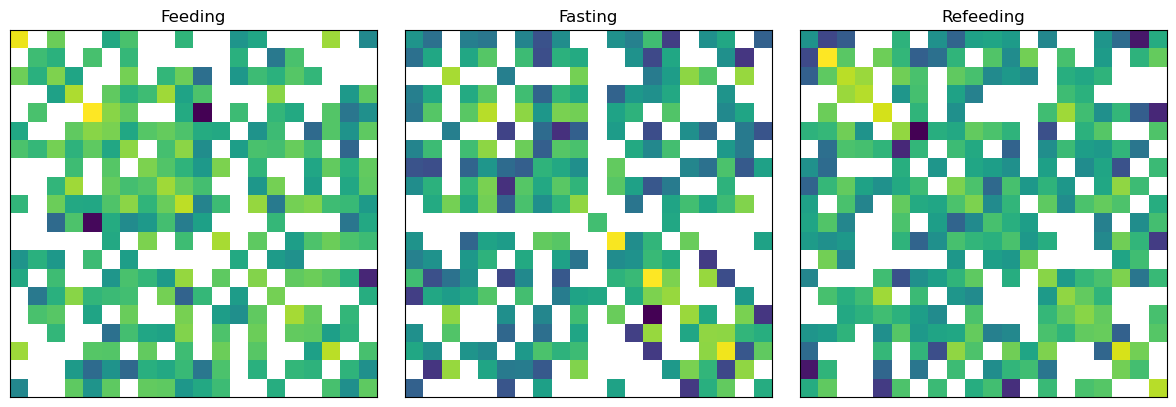

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a row of 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # Adjust figsize as needed

# Plot each matrix on a separate subplot
axs[0].imshow(np.log10(LTI1.f['A']))
axs[0].set_title('Feeding')

axs[1].imshow(np.log10(LTI2.f['A']))
axs[1].set_title('Fasting')

axs[2].imshow(np.log10(LTI3.f['A']))
axs[2].set_title('Refeeding')

# Add a colorbar for one of the plots (or add individually if needed)
# fig.colorbar(axs[2].images[0], ax=axs, orientation='vertical')

for ax in axs:
    # Set all spines (borders) to invisible
#    for spine in ax.spines.values():
#        spine.set_visible(False)
    
    # Remove x and y tick marks
    ax.set_xticks([])
    ax.set_yticks([])


# Display the plots
plt.tight_layout()
plt.show()


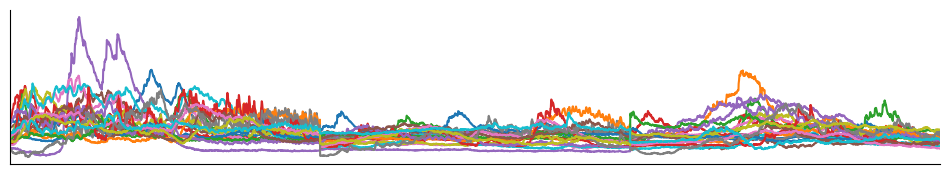

In [129]:
plt.figure(figsize=(12, 2))  # Adjust figsize as needed
full_data = np.concatenate((df_fed.values, df_fast.values, df_refed.values))
plt.plot(full_data)
sns.despine()
plt.xlim([0, full_data.shape[0] - 1])
plt.xticks([])
plt.yticks([])
plt.show()

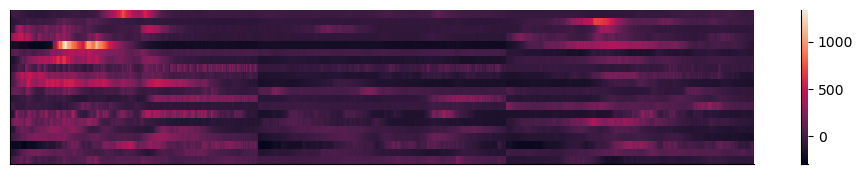

In [132]:
plt.figure(figsize=(12, 2))  # Adjust figsize as needed
full_data = np.concatenate((df_fed.values, df_fast.values, df_refed.values))
sns.heatmap(full_data.T)
sns.despine()
plt.xlim([0, full_data.shape[0] - 1])
plt.xticks([])
plt.yticks([])
plt.show()

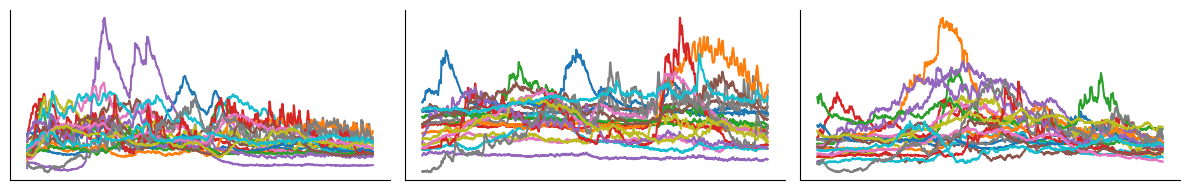

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a row of 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 2))  # Adjust figsize as needed

# Plot each matrix on a separate subplot
axs[0].plot(df_fed.values)
# axs[0].set_title('Feeding')

axs[1].plot(df_fast.values)
# axs[1].set_title('Fasting')

axs[2].plot(df_refed.values)
# axs[2].set_title('Refeeding')

# Add a colorbar for one of the plots (or add individually if needed)
# fig.colorbar(axs[2].images[0], ax=axs, orientation='vertical')

for ax in axs:
    # Set all spines (borders) to invisible
#    for spine in ax.spines.values():
#        spine.set_visible(False)
    
    # Remove x and y tick marks
    ax.set_xticks([])
    ax.set_yticks([])


# Display the plots
sns.despine()
plt.tight_layout()
plt.show()


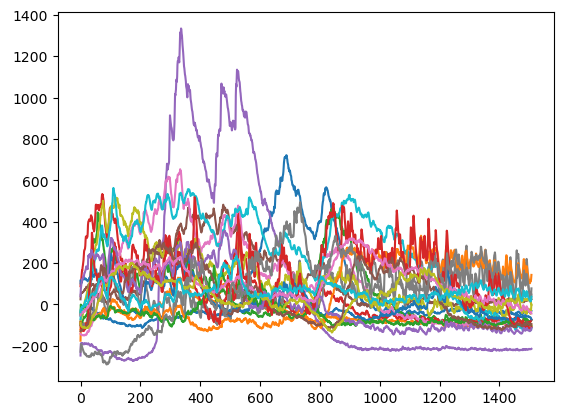

In [112]:
plt.plot(df_fed.values)

### Gramian

In [22]:
W1 = LTI1.observabilityGramian(T=100, reduced=False)
W2 = LTI2.observabilityGramian(T=100, reduced=False)
W3 = LTI3.observabilityGramian(T=100, reduced=False)

print(f"{np.matrix.trace(W1)=}")
print(f"{np.matrix.trace(W2)=}")
print(f"{np.matrix.trace(W3)=}")

W = [W1, W2, W3]

np.matrix.trace(W1)=8.58396474899942
np.matrix.trace(W2)=6.46072263678476
np.matrix.trace(W3)=109.4066154243991


In [26]:
eigenvalues1, eigenvectors1 = np.linalg.eigh(W1)
eigenvalues2, eigenvectors2 = np.linalg.eigh(W2)
eigenvalues3, eigenvectors3 = np.linalg.eigh(W3)

In [55]:
eigenvectors = np.hstack((
    eigenvectors1[:,-3:],
    eigenvectors2[:,-3:],
    eigenvectors3[:,-3:]
))
print(f"{eigenvectors.shape=}")
U, _, Vt = np.linalg.svd(eigenvectors)
print(f"{U.shape=}")
print(f"{Vt.shape=}")


eigenvectors.shape=(20, 9)
U.shape=(20, 20)
Vt.shape=(9, 9)


In [56]:
W1R = Vt[:3,:3]
W2R = Vt[3:6,3:6]
W3R = Vt[6:,6:]
print(f"{W1R.shape=}")
print(f"{W2R.shape=}")
print(f"{W3R.shape=}")

S1 = eigenvalues1[-3:]
S2 = eigenvalues2[-3:]
S3 = eigenvalues3[-3:]

W1R.shape=(3, 3)
W2R.shape=(3, 3)
W3R.shape=(3, 3)


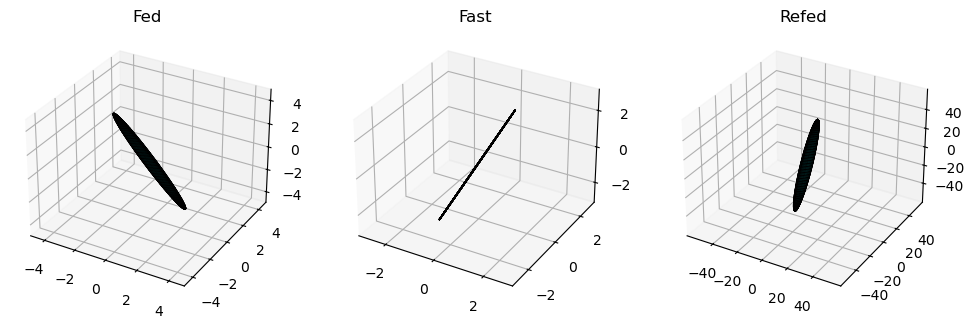

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_ellipse_of_matrix(W, S, ax=None):    
    # Step 1: Create a set of points that form a unit sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 50)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones_like(u), np.cos(v))
    
    # Step 2: Scale and rotate the points using W and S
    ellipsoid_points = np.array([x.flatten(), y.flatten(), z.flatten()])  # Shape: (3, N)
    scaled_points = W @ (ellipsoid_points * S[:, np.newaxis])  # Shape: (3, N)
    
    # Step 3: Reshape back to 2D arrays for plotting
    x_scaled, y_scaled, z_scaled = scaled_points.reshape(3, x.shape[0], x.shape[1])
    
    # Step 4: Plot the ellipsoid
    if ax is None:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(
#        x_scaled, y_scaled, z_scaled, rstride=4, cstride=4, color='cyan', alpha=0.5, edgecolor='k'
        x_scaled, y_scaled, z_scaled, color='cyan', alpha=0.5, edgecolor='k'

    )
    
    # Set plot limits for better visualization
    max_range = np.array([x_scaled.max()-x_scaled.min(), y_scaled.max()-y_scaled.min(), z_scaled.max()-z_scaled.min()]).max() / 2.0
    mid_x = (x_scaled.max()+x_scaled.min()) * 0.5
    mid_y = (y_scaled.max()+y_scaled.min()) * 0.5
    mid_z = (z_scaled.max()+z_scaled.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)


# Initialize the figure
fig = plt.figure(figsize=(12, 4), dpi=100)

# Create individual 3D subplots
ax1 = fig.add_subplot(131, projection='3d')
plot_ellipse_of_matrix(W1R, S1, ax=ax1)
ax1.set_title("Fed")

ax2 = fig.add_subplot(132, projection='3d')
plot_ellipse_of_matrix(W2R, S2, ax=ax2)
ax2.set_title("Fast")

ax3 = fig.add_subplot(133, projection='3d')
plot_ellipse_of_matrix(W3R, S3, ax=ax3)
ax3.set_title("Refed")

# plt.title("3D Ellipsoid from Matrix W and Scaling S")
plt.show()


 /tmp/ipykernel_1455477/1511507940.py:18: RuntimeWarning:invalid value encountered in sqrt


ValueError: too many values to unpack (expected 2)

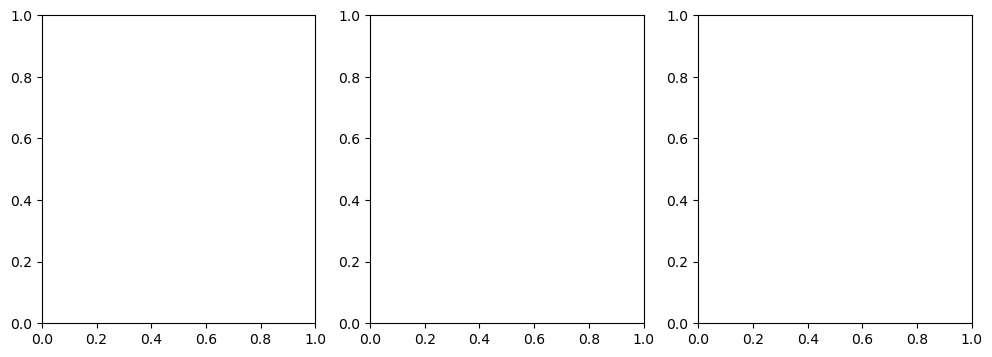

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Sample Gramians (3x3 matrices for demonstration)
# List of Gramians and their labels
gramians = [W1, W2, W3]
titles = ["Time 1", "Time 2", "Time 3"]

# Prepare subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for idx, (W, title) in enumerate(zip(gramians, titles)):
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(W)  # Use top 2x2 if high-dimensional

    # Eigenvalues give the lengths of ellipse axes
    width, height = 2 * np.sqrt(eigenvalues)  # Scaling factor for visibility
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

    # Plot ellipse based on eigenvalues (axes) and eigenvector direction (orientation)
    ell = Ellipse((0, 0), width=width, height=height, angle=angle, color='blue', alpha=0.3)
    axs[idx].add_patch(ell)

    # Add subplot labels and formatting
    axs[idx].set_title(title)
    axs[idx].set_xlim(-3, 3)
    axs[idx].set_ylim(-3, 3)
    axs[idx].set_aspect('equal', 'box')
    axs[idx].axhline(0, color='black', lw=0.5)
    axs[idx].axvline(0, color='black', lw=0.5)

plt.suptitle("Observability Gramians as Ellipses Over Time")

sns.despine()
plt.tight_layout()
plt.show()


In [51]:
W1 = solve_continuous_lyapunov(LTI1.f['A'].T, rhs)
W2 = solve_continuous_lyapunov(LTI2.f['A'].T, rhs)
W3 = solve_continuous_lyapunov(LTI3.f['A'].T, rhs)


 /home/jpic/.local/lib/python3.11/site-packages/scipy/linalg/_solvers.py:191: RuntimeWarning:Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.


In [52]:
print(f"{np.matrix.trace(W1)=}")
print(f"{np.matrix.trace(W2)=}")
print(f"{np.matrix.trace(W3)=}")


np.matrix.trace(W1)=-5.443978351104805e+16
np.matrix.trace(W2)=3.6314491440997683e+18
np.matrix.trace(W3)=-6.625994748333877e+16


In [55]:
sum(sum(LTI1.f['A'].T))

12.011510150670368

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
from scipy.linalg import eigh

# Example usage
# Define a 20x20 Gramian matrix (must be symmetric positive semi-definite)
gramian_matrix = np.random.rand(20, 20)
gramian_matrix = (gramian_matrix + gramian_matrix.T) / 2  # Make it symmetric
gramian = gramian_matrix
scale = 1

# Step 1: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(gramian)

# Step 2: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 3: Select the top 3 eigenvalues and corresponding eigenvectors for 3D representation
top3_eigenvalues = eigenvalues[:3]
top3_eigenvectors = eigenvectors[:, :3]

# Step 4: Compute radii for the ellipsoid in each principal direction
radii = scale * np.sqrt(top3_eigenvalues)

# Step 5: Set up a 3D mesh grid for plotting the ellipsoid
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
x = radii[0] * np.outer(np.cos(u), np.sin(v))
y = radii[1] * np.outer(np.sin(u), np.sin(v))
z = radii[2] * np.outer(np.ones_like(u), np.cos(v))

# Rotate points according to the top 3 eigenvectors
ellipsoid_points = np.array([x.flatten(), y.flatten(), z.flatten()])
rotated_points = top3_eigenvectors @ ellipsoid_points
x_rot, y_rot, z_rot = rotated_points.reshape(3, x.shape[0], x.shape[1])

# Step 6: Plot the ellipsoid in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the rotated ellipsoid surface
ax.plot_surface(
    x_rot + center[0], y_rot + center[1], z_rot + center[2],
    color=color, alpha=alpha, edgecolor='none'
)

# Set plot limits based on the ellipsoid dimensions
max_radius = radii.max()
ax.set_xlim(center[0] - max_radius, center[0] + max_radius)
ax.set_ylim(center[1] - max_radius, center[1] + max_radius)
ax.set_zlim(center[2] - max_radius, center[2] + max_radius)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Projection of Gramian Matrix as Ellipsoid')
plt.show()



ValueError: cannot reshape array of size 100000 into shape (3,100,50)

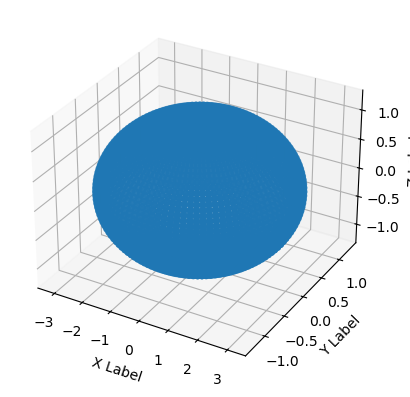

In [203]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

ax.scatter(ellipsoid_points[0,:], ellipsoid_points[1,:], ellipsoid_points[2,:])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

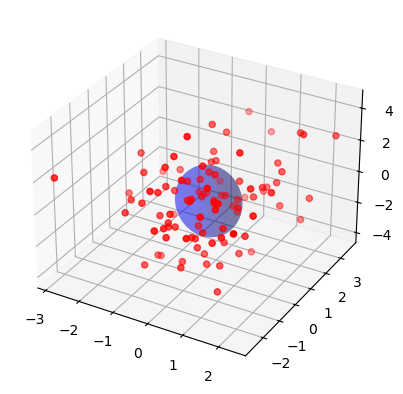

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse

def plot_covariance_ellipse_3d(mean, cov, ax):
    """
    Plots a 3D covariance ellipsoid given the mean and covariance matrix.
    """

    # Compute eigenvalues and eigenvectors of the covariance matrix
    eigvals, eigvecs = np.linalg.eigh(cov)

    # Compute radii of the ellipsoid
    radii = np.sqrt(eigvals)

    # Create a sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radii[0] * np.outer(np.cos(u), np.sin(v))
    y = radii[1] * np.outer(np.sin(u), np.sin(v))
    z = radii[2] * np.outer(np.ones(np.size(u)), np.cos(v))

    # Rotate and translate the sphere
    for i in range(len(x)):
        for j in range(len(x)):
            [x[i, j], y[i, j], z[i, j]] = np.dot([x[i, j], y[i, j], z[i, j]], eigvecs) + mean

    # Plot the ellipsoid
    ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', alpha=0.3)

# Generate some sample data
np.random.seed(0)
data = np.random.multivariate_normal([0, 0, 0], [[1, 0.5, 0.2], [0.5, 2, 0.3], [0.2, 0.3, 3]], 100)

# Compute mean and covariance
mean = np.mean(data, axis=0)
cov = np.cov(data.T)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the ellipsoid
plot_covariance_ellipse_3d(mean, cov, ax)

# Plot the data points
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', marker='o')

plt.show()

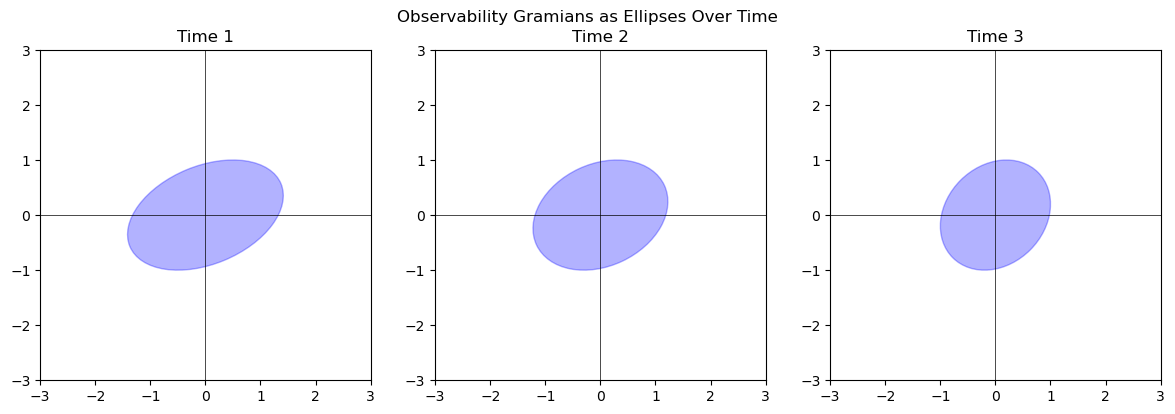

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Sample Gramians (3x3 matrices for demonstration)
W1 = np.array([[2, 0.5, 0], [0.5, 1, 0.2], [0, 0.2, 1.5]])
W2 = np.array([[1.5, 0.3, 0], [0.3, 1, 0.1], [0, 0.1, 1]])
W3 = np.array([[1, 0.2, 0], [0.2, 1, 0.1], [0, 0.1, 0.5]])

# List of Gramians and their labels
gramians = [W1, W2, W3]
titles = ["Time 1", "Time 2", "Time 3"]

# Prepare subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for idx, (W, title) in enumerate(zip(gramians, titles)):
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(W[:2, :2])  # Use top 2x2 if high-dimensional

    # Eigenvalues give the lengths of ellipse axes
    width, height = 2 * np.sqrt(eigenvalues)  # Scaling factor for visibility
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

    # Plot ellipse based on eigenvalues (axes) and eigenvector direction (orientation)
    ell = Ellipse((0, 0), width=width, height=height, angle=angle, color='blue', alpha=0.3)
    axs[idx].add_patch(ell)

    # Add subplot labels and formatting
    axs[idx].set_title(title)
    axs[idx].set_xlim(-3, 3)
    axs[idx].set_ylim(-3, 3)
    axs[idx].set_aspect('equal', 'box')
    axs[idx].axhline(0, color='black', lw=0.5)
    axs[idx].axvline(0, color='black', lw=0.5)

plt.suptitle("Observability Gramians as Ellipses Over Time")
plt.tight_layout()
plt.show()


In [191]:
top3_eigenvalues

array([9.8923071 , 1.66695602, 1.35825356])

In [194]:
radii = scale * np.sqrt(top3_eigenvalues)
radii

array([3.14520382, 1.29110651, 1.16544136])

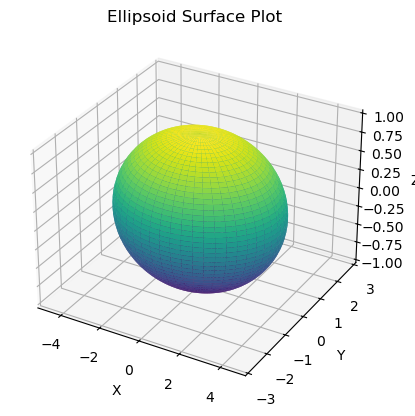

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the ellipsoid parameters
a = 4   # Semi-major axis - x
b = 2   # Semi-minor axis - y
c = 1   # Semi-minor axis - z

# Create a mesh grid
theta = np.linspace(0, np.pi, 50)          # Polar angle
phi = np.linspace(0, 2 * np.pi, 100)   # Azimuthal angle
Theta, Phi = np.meshgrid(theta, phi)

# Calculate the coordinates of points on the ellipsoid surface
X = a * np.sin(Theta) * np.cos(Phi)
Y = b * np.sin(Theta) * np.sin(Phi)
Z = c * np.cos(Theta)

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.axes.set_xlim(-a-1, a+1)
ax.axes.set_ylim(-b-1, b+1)
ax.set_title('Ellipsoid Surface Plot')

plt.show()


In [199]:
X.shape

(100, 50)

## Quick Visualizations

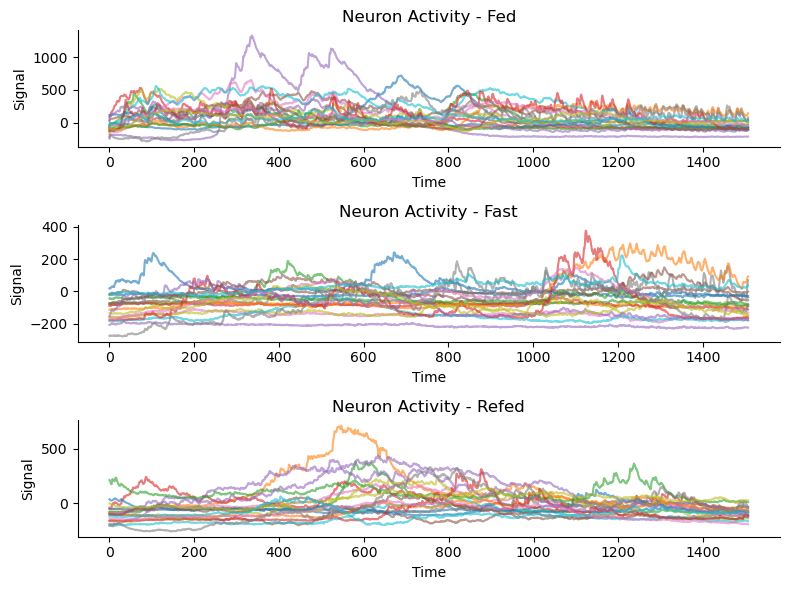

In [22]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(8, 6))
time_fed = range(len(df_fed))
time_fast = range(len(df_fast))
time_refed = range(len(df_refed))

# Plot each dataframe
plt.subplot(3, 1, 1)
for neuron in df_fed.columns:
    plt.plot(time_fed, df_fed[neuron], alpha=0.6)
plt.title('Neuron Activity - Fed')
plt.xlabel('Time')
plt.ylabel('Signal')

plt.subplot(3, 1, 2)
for neuron in df_fast.columns:
    plt.plot(time_fast, df_fast[neuron], alpha=0.6)
plt.title('Neuron Activity - Fast')
plt.xlabel('Time')
plt.ylabel('Signal')

plt.subplot(3, 1, 3)
for neuron in df_refed.columns:
    plt.plot(time_refed, df_refed[neuron], alpha=0.6)
plt.title('Neuron Activity - Refed')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.tight_layout()
sns.despine()
plt.show()


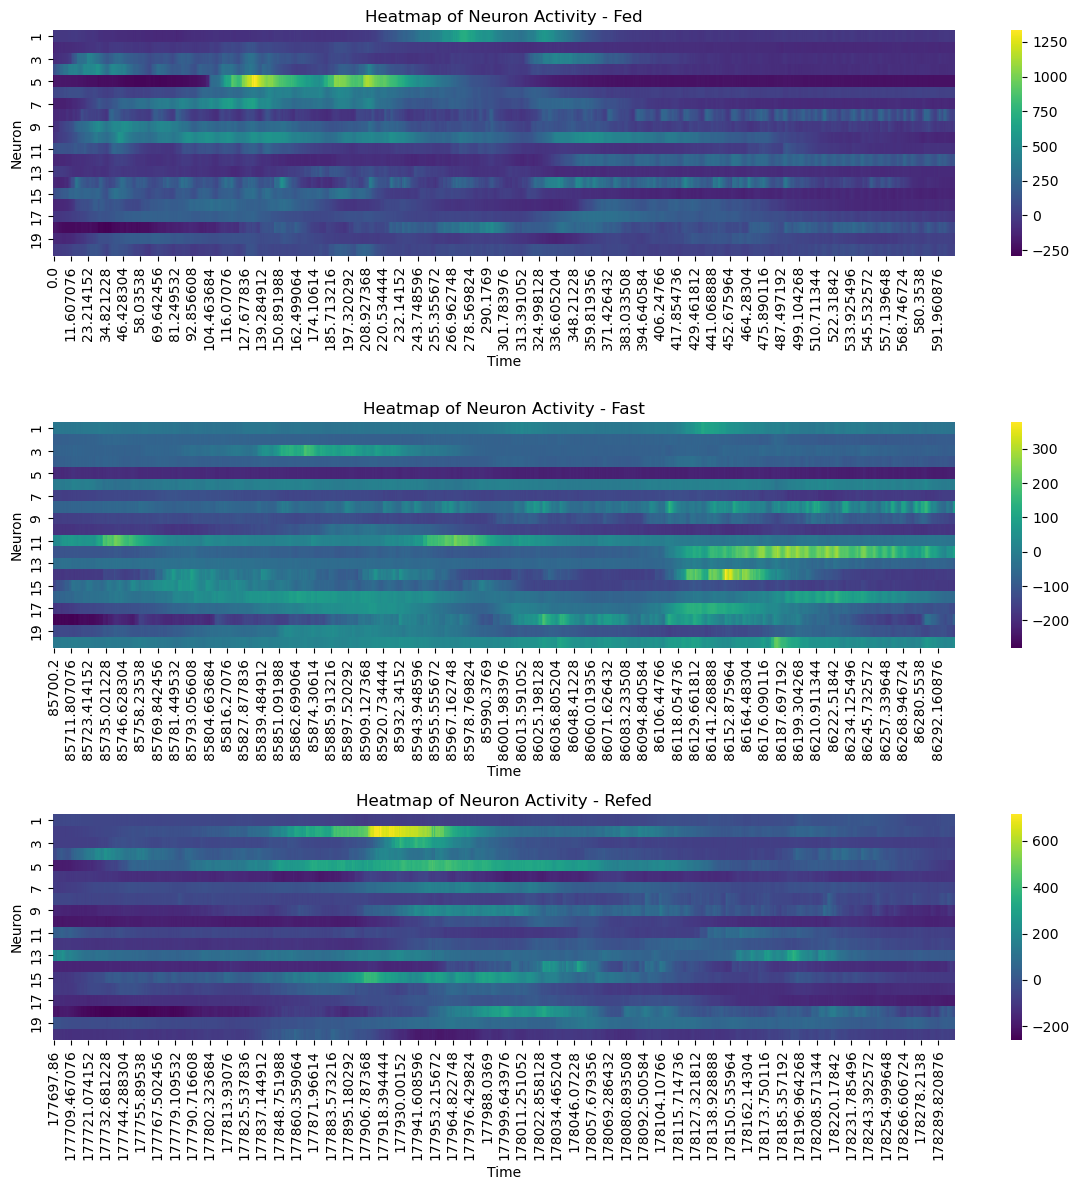

In [23]:
import seaborn as sns

# Plot heatmaps for each condition
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
sns.heatmap(df_fed.T, cmap='viridis', cbar=True)
plt.title('Heatmap of Neuron Activity - Fed')
plt.xlabel('Time')
plt.ylabel('Neuron')

plt.subplot(3, 1, 2)
sns.heatmap(df_fast.T, cmap='viridis', cbar=True)
plt.title('Heatmap of Neuron Activity - Fast')
plt.xlabel('Time')
plt.ylabel('Neuron')

plt.subplot(3, 1, 3)
sns.heatmap(df_refed.T, cmap='viridis', cbar=True)
plt.title('Heatmap of Neuron Activity - Refed')
plt.xlabel('Time')
plt.ylabel('Neuron')

plt.tight_layout()
plt.show()


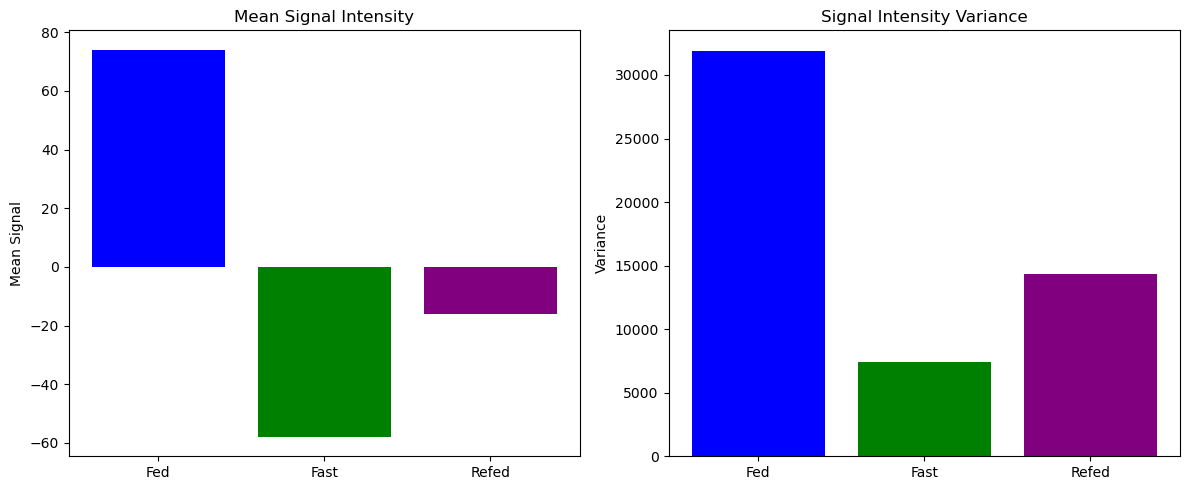

In [24]:
import numpy as np

# Aggregate statistics
means = [np.mean(df_fed.values), np.mean(df_fast.values), np.mean(df_refed.values)]
variances = [np.var(df_fed.values), np.var(df_fast.values), np.var(df_refed.values)]

# Create a summary plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].bar(['Fed', 'Fast', 'Refed'], means, color=['blue', 'green', 'purple'])
ax[0].set_title('Mean Signal Intensity')
ax[0].set_ylabel('Mean Signal')

ax[1].bar(['Fed', 'Fast', 'Refed'], variances, color=['blue', 'green', 'purple'])
ax[1].set_title('Signal Intensity Variance')
ax[1].set_ylabel('Variance')

plt.tight_layout()
plt.show()


In [3]:
plt.imshow(np.corrcoef(df_fed.values.T))
plt.show()
plt.imshow(np.corrcoef(df_fast.values.T))
plt.show()
plt.imshow(np.corrcoef(df_refed.values.T))
plt.show()

NameError: name 'plt' is not defined

# Physionet

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mne # reads .edf files

from copy import deepcopy
import copy
import os

# Plotting
import seaborn as sns
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 7, 3
# import umap

from scr import bioObsv
from scr.dataPrep import *
from scr.visualization import *
from scr.estimation import *

from nb_util import *
# reload(nb_util)


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mne # reads .edf files

## Load data

In [2]:
path = "/nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/"
subdirectories = [f.path for f in os.scandir(path) if f.is_dir()]
eyesOpenSignals = []
eyesClosedSignals = []
for participantPath in subdirectories:
    participant = participantPath.split('/')[-1]
    # eyes open
    file = participantPath + '/' +  participant + 'R01.edf'
    data = mne.io.read_raw_edf(file)
    eyesOpenSignals.append(data.get_data())
    # eyes closed
    file = participantPath + '/' +  participant + 'R02.edf'
    data = mne.io.read_raw_edf(file)
    eyesClosedSignals.append(data.get_data())
channels = data.ch_names

t = 160
eyesOpen, eyesClosed = np.zeros((64, t, len(eyesOpenSignals))), np.zeros((64, t, len(eyesClosedSignals)))
for rep in range(109):
    eyesOpen[:,:,rep]   = eyesOpenSignals[rep][:,:t]
    eyesClosed[:,:,rep] = eyesClosedSignals[rep][:,:t]
eyesOpenA   = np.mean(eyesOpen, axis=2)
eyesClosedA = np.mean(eyesClosed, axis=2)
eyesOpenA   = eyesOpenA[:,:,np.newaxis]
eyesClosedA = eyesClosedA[:,:,np.newaxis]

Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S105/S105R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S105/S105R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S087/S087R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S087/S087R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S040/S040R01.edf...
EDF

In [3]:
eyesOpenSignals[0].shape

(64, 9760)

In [4]:
states = list(np.arange(64))
LTV = bioObsv.Model.LinearTimeVariant(
    data=eyesOpenSignals[0],
    states=states,
    dmdRanks=[-1]
)

 /home/jpic/bioObsv/scr/Model.py:677: RuntimeWarning:invalid value encountered in divide


In [5]:
LTV.LTI[0].f['A'].shape

(64, 64)

In [45]:
G = {}
duration = 100
MAXTIME = 1000
for state in range(64):
    G[state] = []
    print(f"{state=}")
    for i in range(MAXTIME):
        if i % 250 == 0:
            print(f"{i=}")
        C = np.zeros((1,64))
        C[0, state] = 1
        phi = np.eye(64)
        W = np.zeros((64,64))
        for t in range(duration):
            # update gramian
            half = C @ phi
            W += (half.T @ half)

            # update phi
            At = LTV.LTI[t+i].f['A']
            phi = At @ phi
        G[state].append(W)
        if i + duration >= MAXTIME:
            break


state=0
i=0
i=250
i=500
i=750
state=1
i=0
i=250
i=500
i=750
state=2
i=0
i=250
i=500
i=750
state=3
i=0
i=250
i=500
i=750
state=4
i=0
i=250
i=500
i=750
state=5
i=0
i=250
i=500
i=750
state=6
i=0
i=250
i=500
i=750
state=7
i=0
i=250
i=500
i=750
state=8
i=0
i=250
i=500
i=750
state=9
i=0
i=250
i=500
i=750
state=10
i=0
i=250
i=500
i=750
state=11
i=0
i=250
i=500
i=750
state=12
i=0
i=250
i=500
i=750
state=13
i=0
i=250
i=500
i=750
state=14
i=0
i=250
i=500
i=750
state=15
i=0
i=250
i=500
i=750
state=16
i=0
i=250
i=500
i=750
state=17
i=0
i=250
i=500
i=750
state=18
i=0
i=250
i=500
i=750
state=19
i=0
i=250
i=500
i=750
state=20
i=0
i=250
i=500
i=750
state=21
i=0
i=250
i=500
i=750
state=22
i=0
i=250
i=500
i=750
state=23
i=0
i=250
i=500
i=750
state=24
i=0
i=250
i=500
i=750
state=25
i=0
i=250
i=500
i=750
state=26
i=0
i=250
i=500
i=750
state=27
i=0
i=250
i=500
i=750
state=28
i=0
i=250
i=500
i=750
state=29
i=0
i=250
i=500
i=750
state=30
i=0
i=250
i=500
i=750
state=31
i=0
i=250
i=500
i=750
state=32
i=0
i=250

In [46]:
import pickle

# Define the path to the pickle file
input_path = 'data/EEG-G.pkl'

# Load the object from the file
with open(input_path, 'rb') as file:
    G = pickle.load(file)


In [47]:
MAXTIME = 1000
traces = np.zeros((64,MAXTIME))
for state in range(64):
    print(f"{state=}")
    for i in range(MAXTIME):
        W = G[state][i]
        traces[state][i] = np.matrix.trace(W)
        if i + duration >= MAXTIME:
            break


state=0
state=1
state=2
state=3
state=4
state=5
state=6
state=7
state=8
state=9
state=10
state=11
state=12
state=13
state=14
state=15
state=16
state=17
state=18
state=19
state=20
state=21
state=22
state=23
state=24
state=25
state=26
state=27
state=28
state=29
state=30
state=31
state=32
state=33
state=34
state=35
state=36
state=37
state=38
state=39
state=40
state=41
state=42
state=43
state=44
state=45
state=46
state=47
state=48
state=49
state=50
state=51
state=52
state=53
state=54
state=55
state=56
state=57
state=58
state=59
state=60
state=61
state=62
state=63


([], [])

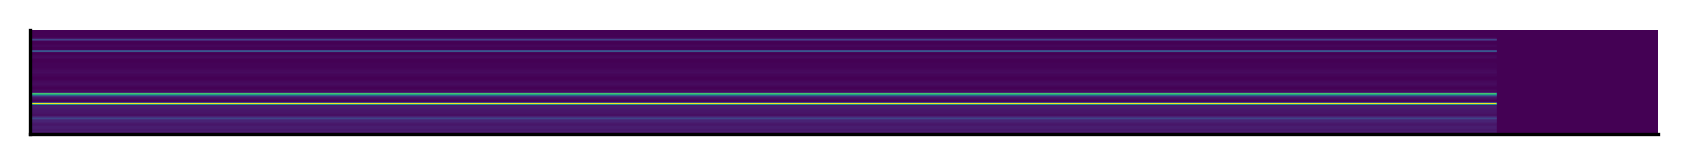

In [48]:
plt.imshow(traces)
sns.despine()
plt.xticks([])
plt.yticks([])


In [49]:
traces

array([[1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.77700139e+03, 5.77700139e+03, 5.77700139e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.76816058e+03, 5.76816058e+03, 5.76816058e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.76354613e+05, 2.76354613e+05, 2.76354613e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.60400996e+05, 3.60400996e+05, 3.60400996e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.02997403e+05, 2.02997403e+05, 2.02997403e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [21]:
np.matrix.trace(A)

276069.93868241325

In [14]:
G[state][-1]

array([[ 1526.55466014,  1163.08926487,  -981.35656723, ...,
         2507.91122738,  1526.55466014,  2149.15497315],
       [ 1163.08926487,   886.16324942,  -747.7002417 , ...,
         1910.78950657,  1163.08926487,  1637.45140812],
       [ -981.35656723,  -747.7002417 ,   630.87207894, ...,
        -1612.22864617,  -981.35656723, -1381.5996256 ],
       ...,
       [ 2507.91122738,  1910.78950657, -1612.22864617, ...,
         4120.13987355,  2507.91122738,  3530.75459875],
       [ 1526.55466014,  1163.08926487,  -981.35656723, ...,
         2507.91122738,  1526.55466014,  2149.15497315],
       [ 2149.15497315,  1637.45140812, -1381.5996256 , ...,
         3530.75459875,  2149.15497315,  3093.16661005]])

In [13]:
W

array([[ 2.26807871e-02,  9.99010850e-03, -1.53748081e-02, ...,
         4.53570218e-03, -9.91895523e-03,  1.17667628e+00],
       [ 9.99010850e-03,  7.48250180e-03, -6.88306493e-03, ...,
        -2.06605575e-03, -8.98149059e-03,  8.06591097e-01],
       [-1.53748081e-02, -6.88306493e-03,  1.04279984e-02, ...,
        -2.90937515e-03,  6.90813718e-03, -8.06025705e-01],
       ...,
       [ 4.53570218e-03, -2.06605575e-03, -2.90937515e-03, ...,
         8.09078114e-03,  5.63378613e-03, -7.99388740e-02],
       [-9.91895523e-03, -8.98149059e-03,  6.90813718e-03, ...,
         5.63378613e-03,  1.25619266e-02, -8.95851449e-01],
       [ 1.17667628e+00,  8.06591097e-01, -8.06025705e-01, ...,
        -7.99388740e-02, -8.95851449e-01,  9.93988493e+01]])

## Previous Example

In [ ]:
path = "/nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/"
subdirectories = [f.path for f in os.scandir(path) if f.is_dir()]
eyesOpenSignals = []
eyesClosedSignals = []
task1Signals, task2Signals, task3Signals, task4Signals = [], [], [], []
for participantPath in subdirectories:
    participant = participantPath.split('/')[-1]
    # eyes open
    file = participantPath + '/' +  participant + 'R01.edf'
    data = mne.io.read_raw_edf(file)
    eyesOpenSignals.append(data.get_data())
    # eyes closed
    file = participantPath + '/' +  participant + 'R02.edf'
    data = mne.io.read_raw_edf(file)
    eyesClosedSignals.append(data.get_data())
    # task1
    for f in ['R03', 'R07', 'R11']:
        file = participantPath + '/' +  participant + f + '.edf'
        data = mne.io.read_raw_edf(file)
        task1Signals.append(data.get_data())
    # task2
    for f in ['R04', 'R08', 'R12']:
        file = participantPath + '/' +  participant + f + '.edf'
        data = mne.io.read_raw_edf(file)
        task2Signals.append(data.get_data())
    # task3
    for f in ['R05', 'R09', 'R13']:
        file = participantPath + '/' +  participant + f + '.edf'
        data = mne.io.read_raw_edf(file)
        task3Signals.append(data.get_data())
    # task4
    for f in ['R06', 'R10', 'R14']:
        file = participantPath + '/' +  participant + f + '.edf'
        data = mne.io.read_raw_edf(file)
        task4Signals.append(data.get_data())

Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S105/S105R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S105/S105R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S105/S105R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S105/S105R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S105/S105R11.edf...
EDF

 /tmp/ipykernel_2450957/3604834165.py:19: RuntimeWarning:Limited 1 annotation(s) that were expanding outside the data range.
 /tmp/ipykernel_2450957/3604834165.py:19: RuntimeWarning:Limited 1 annotation(s) that were expanding outside the data range.


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S100/S100R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


 /tmp/ipykernel_2450957/3604834165.py:19: RuntimeWarning:Limited 1 annotation(s) that were expanding outside the data range.
 /tmp/ipykernel_2450957/3604834165.py:24: RuntimeWarning:Limited 1 annotation(s) that were expanding outside the data range.


Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S100/S100R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S100/S100R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S100/S100R09.edf...
EDF file detected


 /tmp/ipykernel_2450957/3604834165.py:24: RuntimeWarning:Limited 1 annotation(s) that were expanding outside the data range.
 /tmp/ipykernel_2450957/3604834165.py:24: RuntimeWarning:Limited 1 annotation(s) that were expanding outside the data range.
 /tmp/ipykernel_2450957/3604834165.py:29: RuntimeWarning:Limited 1 annotation(s) that were expanding outside the data range.


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S100/S100R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S100/S100R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S100/S100R10.edf...
EDF file detected


 /tmp/ipykernel_2450957/3604834165.py:29: RuntimeWarning:Limited 1 annotation(s) that were expanding outside the data range.
 /tmp/ipykernel_2450957/3604834165.py:29: RuntimeWarning:Limited 1 annotation(s) that were expanding outside the data range.
 /tmp/ipykernel_2450957/3604834165.py:34: RuntimeWarning:Limited 1 annotation(s) that were expanding outside the data range.


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S100/S100R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


 /tmp/ipykernel_2450957/3604834165.py:34: RuntimeWarning:Limited 1 annotation(s) that were expanding outside the data range.


Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S015/S015R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S015/S015R02.edf...
EDF file detected


 /tmp/ipykernel_2450957/3604834165.py:34: RuntimeWarning:Limited 1 annotation(s) that were expanding outside the data range.


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S015/S015R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S015/S015R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S015/S015R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/S015/S015R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /nfs/turbo/umms-indikar/Joshua/obsvArtic

In [3]:
t = 160
offset = 160*5
eyesOpen, eyesClosed, task1, task2, task3, task4 = np.zeros((64, t, len(eyesOpenSignals))), np.zeros((64, t, len(eyesClosedSignals))), np.zeros((64, t, len(eyesOpenSignals))), np.zeros((64, t, len(eyesOpenSignals))), np.zeros((64, t, len(eyesOpenSignals))), np.zeros((64, t, len(eyesOpenSignals)))
for rep in range(109):
    eyesOpen[:,:,rep]   = eyesOpenSignals[rep][:,offset:offset+t]
    eyesClosed[:,:,rep] = eyesClosedSignals[rep][:,offset:offset+t]
    task1[:,:,rep]      = task1Signals[rep][:,offset:offset+t]
    task2[:,:,rep]      = task2Signals[rep][:,offset:offset+t]
    task3[:,:,rep]      = task3Signals[rep][:,offset:offset+t]
    task4[:,:,rep]      = task4Signals[rep][:,offset:offset+t]
print(eyesOpen.shape)
print(eyesClosed.shape)
print(task1.shape)
print(task2.shape)
print(task3.shape)
print(task4.shape)

(64, 160, 109)
(64, 160, 109)
(64, 160, 109)
(64, 160, 109)
(64, 160, 109)
(64, 160, 109)


In [4]:
dfloc = pd.read_csv('/nfs/turbo/umms-indikar/Joshua/obsvArticle/eeg/physionet.org/files/eegmmidb/1.0.0/wfdbcal',header=None, delimiter='\t')
dfloc = dfloc.rename(columns={0:'sensor',1:'notes'})
circleIdxs = [15,49,9,39,14,11,23,13,6,34,12,40,38,45,24,48,17,44,41,27,47,4,5,7,29,56,31,51,46,36,16,10,20,35,63,37,19,50,53,55,28,54,8,2,33,43,21,25,61,62,26,22,3,32,18,58,30,57,42,60,59,1,0,52]
dfloc['circle'] = circleIdxs
dfloc['x'] = 0
dfloc['y'] = 0
dfloc['r'] = 16
dfloc['signal'] = np.arange(64)

dfCircs = pd.read_csv('64_channel_sharbrough_circles.csv')
for i, c in enumerate(dfloc['circle']):
    dfloc['x'][i] = dfCircs['x'][c]
    dfloc['y'][i] = dfCircs['y'][c]
dfO = dfloc.copy()
dfC = dfloc.copy()
df1 = dfloc.copy()
df2 = dfloc.copy()
df3 = dfloc.copy()
df4 = dfloc.copy()
dft = dfloc.copy()

 /tmp/ipykernel_1130874/832755542.py:12: FutureWarning:ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

 /tmp/ipykernel_1130874/832755542.py:12: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

In [5]:
channels = data.ch_names

In [6]:
LTIO = bioObsv.Model.LinearTimeInvariant(data=eyesOpen, A=None, DMD=True, dmdRank=-1, states=channels)
ss   = bioObsv.sensorSelection.obsvEnergyMaximization(LTIO)
dfO  = dfO.merge(ss['sensors'], left_on='sensor', right_on='state')
print('open')
LTIC = bioObsv.Model.LinearTimeInvariant(data=eyesClosed, A=None, DMD=True, dmdRank=-1, states=channels)
ss   = bioObsv.sensorSelection.obsvEnergyMaximization(LTIC)
dfC  = dfC.merge(ss['sensors'], left_on='sensor', right_on='state')
print('closed')
LTI1 = bioObsv.Model.LinearTimeInvariant(data=task1, A=None, DMD=True, dmdRank=-1, states=channels)
ss   = bioObsv.sensorSelection.obsvEnergyMaximization(LTI1)
df1  = df1.merge(ss['sensors'], left_on='sensor', right_on='state')
print('task1')
LTI2 = bioObsv.Model.LinearTimeInvariant(data=task2, A=None, DMD=True, dmdRank=-1, states=channels)
ss   = bioObsv.sensorSelection.obsvEnergyMaximization(LTI2)
df2  = df2.merge(ss['sensors'], left_on='sensor', right_on='state')
print('task2')
LTI3 = bioObsv.Model.LinearTimeInvariant(data=task3, A=None, DMD=True, dmdRank=-1, states=channels)
ss   = bioObsv.sensorSelection.obsvEnergyMaximization(LTI3)
df3  = df3.merge(ss['sensors'], left_on='sensor', right_on='state')
print('task3')
LTI4 = bioObsv.Model.LinearTimeInvariant(data=task4, A=None, DMD=True, dmdRank=-1, states=channels)
ss   = bioObsv.sensorSelection.obsvEnergyMaximization(LTI4)
df4  = df4.merge(ss['sensors'], left_on='sensor', right_on='state')
print('task4')

open
closed
task1
task2
task3
task4


In [9]:
del LTIO, LTIC, LTI1, LTI2, LTI3, LTI4

In [ ]:
total = np.concatenate((eyesOpen, eyesClosed, task1,task2, task3, task4), axis=1)
total.shape

In [ ]:
LTIt = bioObsv.Model.LinearTimeInvariant(data=total, A=None, DMD=True, dmdRank=5, states=channels)
ss   = bioObsv.sensorSelection.obsvEnergyMaximization(LTIt)
dft  = dft.merge(ss['sensors'], left_on='sensor', right_on='state')
print('total')

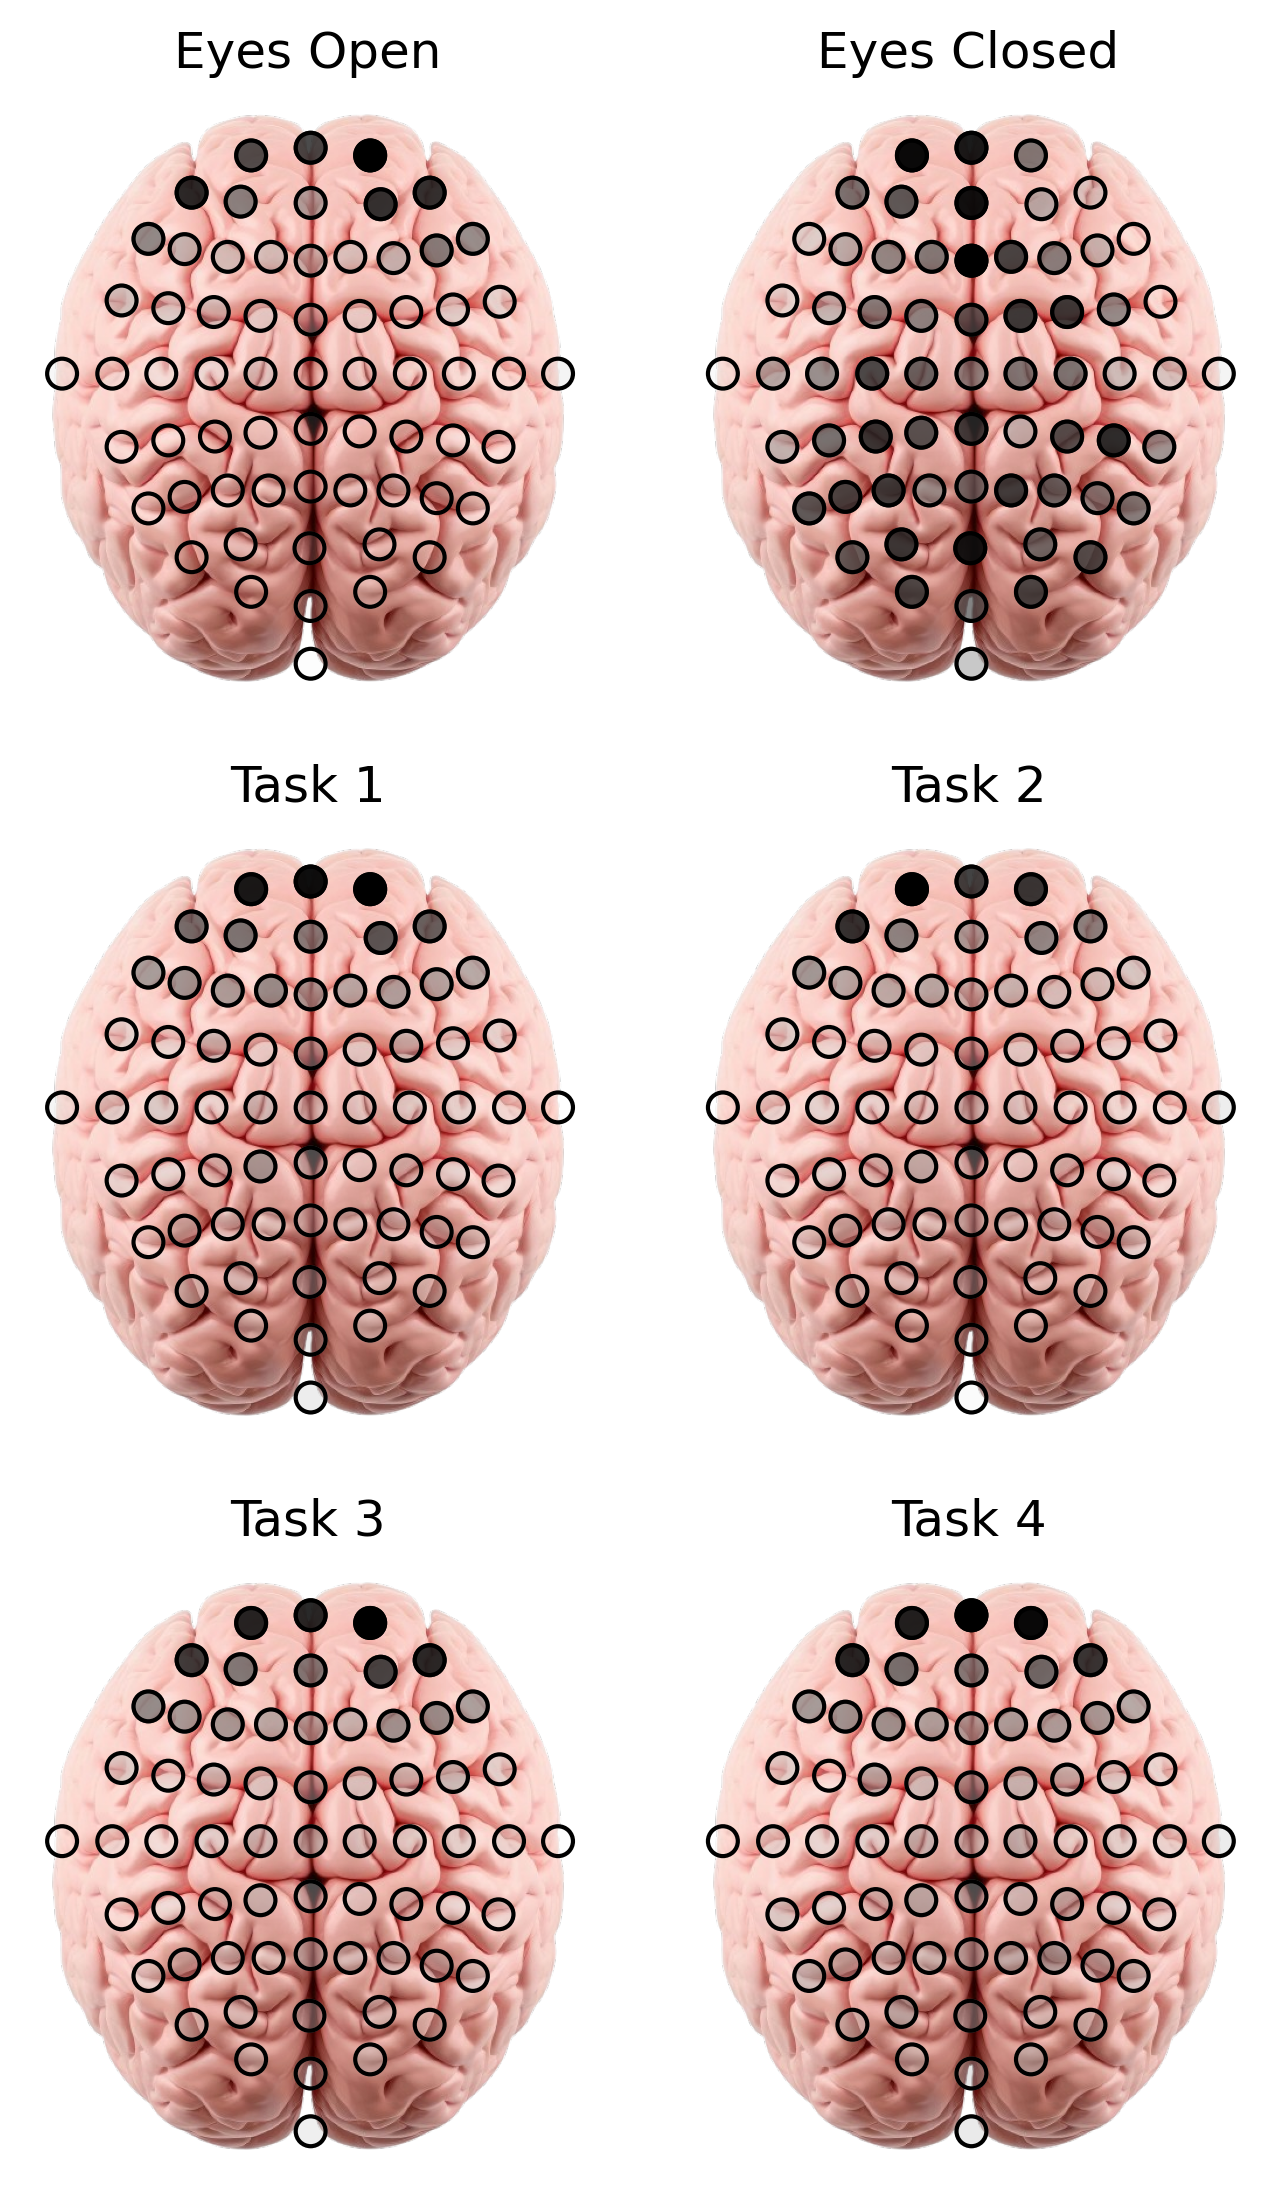

In [7]:
# Create subplots
dfs = [dfO, dfC, df1, df2, df3, df4]
titles = ['Eyes Open', 'Eyes Closed', 'Task 1', 'Task 2', 'Task 3', 'Task 4']

fig, axs = plt.subplots(3, 2, figsize=(6, 9), dpi=300)
axs = axs.flatten()
for i, ax in enumerate(axs):
    df = dfs[i]
    ax.imshow(plt.imread('brain2.png'))
    norm = plt.Normalize(df['weight'].min(), df['weight'].max())
    cmap = plt.cm.get_cmap('Greys')
    for index, row in df.iterrows():
        color = cmap(norm(row['weight']))
        y = (1.1*(row['y'] - 277)) + 240
        x = (1*(row['x'] - 300)) + 240
        circle = plt.Circle((x, y), 0.8*row['r'], color=color, fill=True, alpha=norm(row['weight']))
        ax.add_patch(circle)
        circle = plt.Circle((x, y), 0.8*row['r'], color='k', fill=False) #, alpha=norm(row['weight']))
        ax.add_patch(circle)
    ax.set_title(titles[i])
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    
plt.subplots_adjust(wspace=-0.1)
#plt.subplots_adjust(hspace=-0.1)
# plt.savefig('r5brainAllTasks.png')

In [8]:
ranks = [[i + 1for i in range(64)]]
for i in range(6):
    ranks.append(dfs[i]['rank'].values)
df_rank = pd.DataFrame(ranks).T

 <>:1: SyntaxWarning:invalid decimal literal
 <>:1: SyntaxWarning:invalid decimal literal
 /tmp/ipykernel_1130874/225271978.py:1: SyntaxWarning:invalid decimal literal


In [24]:
df_rank.columns = ['Index'] + titles
for col in df_rank.columns:
    df_rank[col] = df_rank[col].astype(int)
df_rank.astype(int)
df_rank.to_csv('data/eeg-ranks.csv')
df_rank

Index  Eyes Open  Eyes Closed  Task 1  Task 2  Task 3  Task 4
0       1         19           52      48      48      49      63
1       2         18           38      20      26      24      20
2       3         24           40      54      31      30      33
3       4         23           24      19      20      21      19
4       5         26            9      33      33      26      25
..    ...        ...          ...     ...     ...     ...     ...
59     60         52           19      49      51      60      44
60     61         62           17      56      63      46      43
61     62         33           33      46      57      59      50
62     63         37           16      47      58      34      31
63     64         49           53      50      62      50      55

[64 rows x 7 columns]

### Snakey Plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_rank = pd.read_csv('data/eeg-ranks.csv')
df_rank = df_rank.drop(['Unnamed: 0'], axis=1)
df_rank['Index'] = 64 * [1]
df_rank

Index  Eyes Open  Eyes Closed  Task 1  Task 2  Task 3  Task 4
0       1         19           52      48      48      49      63
1       1         18           38      20      26      24      20
2       1         24           40      54      31      30      33
3       1         23           24      19      20      21      19
4       1         26            9      33      33      26      25
..    ...        ...          ...     ...     ...     ...     ...
59      1         52           19      49      51      60      44
60      1         62           17      56      63      46      43
61      1         33           33      46      57      59      50
62      1         37           16      47      58      34      31
63      1         49           53      50      62      50      55

[64 rows x 7 columns]

In [46]:
fcols = [['k' for i in range(66)] for j in range(20)]
for lead in range(64):
    if df_rank['Eyes Open'].iloc[lead] < 22:
        pos = list(df_rank.iloc[lead].values)[1:-1]
        fcols[0][pos[0]] = 'g'
        fcols[1][pos[1]] = 'g'
        fcols[2][pos[2]] = 'g'
        fcols[3][pos[3]] = 'g'
        fcols[4][pos[4]] = 'g'
    elif df_rank['Eyes Open'].iloc[lead] > 42:
        pos = list(df_rank.iloc[lead].values)[1:-1]
        fcols[0][pos[0]] = 'r'
        fcols[1][pos[1]] = 'r'
        fcols[2][pos[2]] = 'r'
        fcols[3][pos[3]] = 'r'
        fcols[4][pos[4]] = 'r'


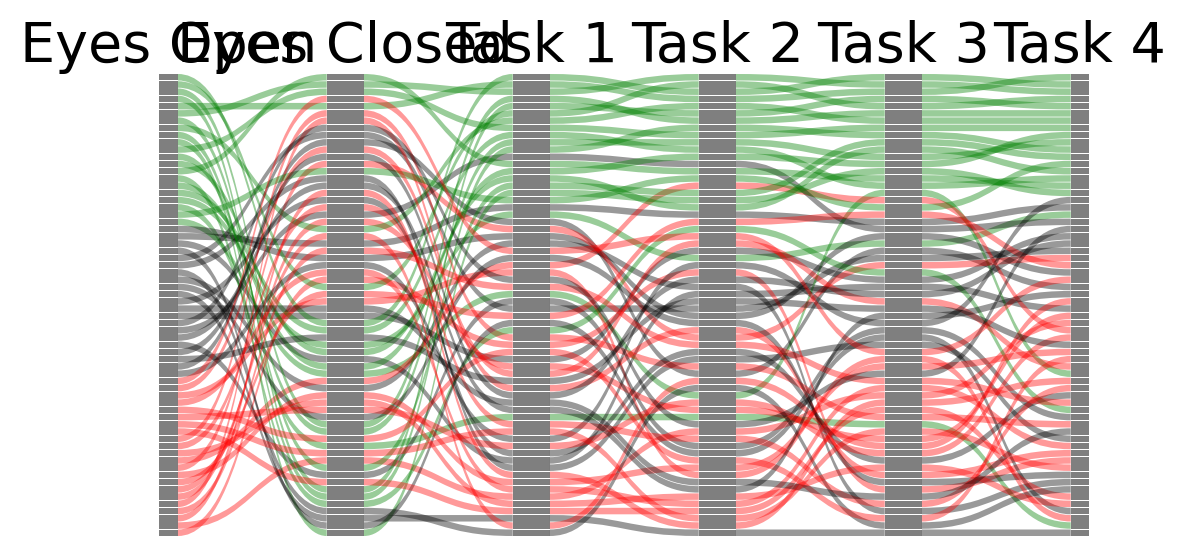

In [47]:
plt.figure(figsize=(6,3), dpi=200)
cols = [['k' for i in range(66)] for j in range(20)]
# cols[0][1] = 'g'
# cols[1][1] = 'g'
# fcols = [['k' for i in range(66)] for j in range(20)]




sankey(
    df_rank,
    labels_color=None,
    cmap=plt.get_cmap('viridis'),
    flow_colors = fcols,
    colors = cols
)

In [3]:
df_rank2 = df_rank[['Index', 'Eyes Open', 'Eyes Closed']] # , 'Task 1']]
df_rank2['Avg'] = df_rank2[['Eyes Open', 'Eyes Closed']].mean(axis=1) # , 'Task 1']].mean(axis=1)
sorted_indices = df_rank2['Avg'].argsort()
avg_rank = 64 * [0]
for i, j in enumerate(sorted_indices.values):
    avg_rank[j] = i + 1
df_rank2['Avg'] = avg_rank
df_rank2 = df_rank2[['Index', 'Avg', 'Eyes Open', 'Eyes Closed']] # , 'Task 1']]
df_rank2

/tmp/ipykernel_1217759/1081844661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank2['Avg'] = df_rank2[['Eyes Open', 'Eyes Closed']].mean(axis=1) # , 'Task 1']].mean(axis=1)
/tmp/ipykernel_1217759/1081844661.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank2['Avg'] = avg_rank


Index  Avg  Eyes Open  Eyes Closed
0       1   39         19           52
1       1   24         18           38
2       1   31         24           40
3       1   12         23           24
4       1    8         26            9
..    ...  ...        ...          ...
59      1   38         52           19
60      1   47         62           17
61      1   32         33           33
62      1   21         37           16
63      1   62         49           53

[64 rows x 4 columns]

#### debug

In [29]:
quantiles

array([0. , 0.5, 1. ])

3
phase=0
skip right!
starts.index=Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
      dtype='int64', name=' ')
phase=1
starts.index=Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
      dtype='int64', name='   ')
starts.index=Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
      dtype=

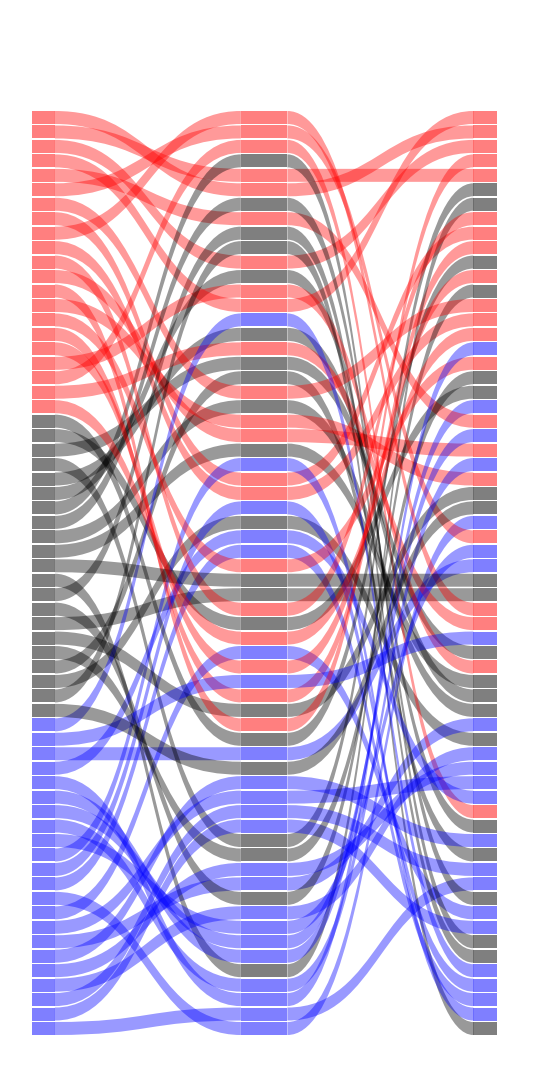

In [83]:
plt.figure(figsize=(2, 4), dpi=300)
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
colors = ['k', 'b', 'r']
fcols = [['k' for i in range(66)] for j in range(20)]
# Determine the 8 quantiles of the 'Avg' column to create 8 groups
quantiles = np.linspace(0, 1, len(colors) + 1) # len(colors) + 2)  # 9 values for 8 bins (groups)
bins = np.percentile(df_rank2['Avg'], quantiles * 100)

# Iterate over each lead (assumes `df_rank2` has at least 64 rows)
for lead in range(64):
    avg_value = df_rank2['Avg'].iloc[lead]
    
    # Find which group the avg_value belongs to
    group_index = np.digitize(avg_value, bins) - 1 # np.digitize returns 1-based index, so subtract 1
    # if avg_value == 1:
    #     group_index = 1
    # print(group_index)
    # Select the appropriate color from the 'colors' list based on the group
    selected_color = colors[group_index-1]
    if avg_value == df_rank2['Avg'].max():
        selected_color = colors[-2] # = 'orange':
        print(group_index)
#    if avg_value == 64:
#        selected_color = colors[-1]
    # Get the positions for each lead (excluding the first and last columns)
    pos = list(df_rank2.iloc[lead].values)[1:]
    
    # Update the fcols array based on the positions and selected color
    for i in range(len(pos)):
        fcols[i][pos[i]] = selected_color

'''
fcols = [['r' for i in range(66)] for j in range(20)]
for lead in range(64):
    if df_rank2['Avg'].iloc[lead] < 22:
        pos = list(df_rank2.iloc[lead].values)[1:-1]
        for i in range(len(pos)):
            fcols[i][pos[i]] = 'y'
            cols[i][pos[i]] = 'y'
    elif df_rank2['Avg'].iloc[lead] > 42:
        pos = list(df_rank2.iloc[lead].values)[1:-1]
        for i in range(len(pos)):
            fcols[i][pos[i]] = 'b'
            cols[i][pos[i]] = 'b'
'''
df_rank2_p = df_rank2.copy()
df_rank2_p.columns = ['Index', ' ', '  ', '   ']
sankey(
    df_rank2_p,
    labels_color=None,
    cmap=plt.get_cmap('viridis'),
    flow_colors = fcols,
    colors = fcols
)
plt.savefig('eeg-ranking-sankey.png', transparent=True)

In [60]:
colors[-2]

'k'

In [55]:
sorted_indices = df_rank2['Avg'].argsort()
sorted_indices
avg_rank = 64 * [0]
for i, j in enumerate(sorted_indices.values):
    avg_rank[j] = i + 1
df_rank2['Avg'] = avg_rank


[43,
 22,
 42,
 11,
 14,
 21,
 27,
 30,
 32,
 16,
 50,
 37,
 36,
 51,
 52,
 39,
 15,
 25,
 64,
 47,
 28,
 1,
 2,
 6,
 7,
 5,
 3,
 9,
 12,
 24,
 18,
 17,
 10,
 4,
 8,
 13,
 23,
 26,
 38,
 49,
 35,
 63,
 59,
 60,
 55,
 62,
 56,
 34,
 31,
 57,
 48,
 29,
 45,
 61,
 46,
 41,
 20,
 19,
 53,
 44,
 54,
 40,
 33,
 58]

In [53]:
df_rank2.iloc[21]

Index          1.000000
Eyes Open      6.000000
Eyes Closed    2.000000
Task 1         3.000000
Avg            3.666667
Name: 21, dtype: float64

In [30]:
np.where(df_rank['Eyes Open'] == 1)

(array([23]),)

In [33]:
fcols[0][0] = 'g'
fcols[1][23] = 'g'
fcols[2][23] = 'g'
fcols[3][23] = 'g'
fcols[4][23] = 'g'

In [39]:
list(df_rank.iloc[23].values)[1:-1]


KeyboardInterrupt



In [27]:
df_rank.min()

Index          1
Eyes Open      1
Eyes Closed    1
Task 1         1
Task 2         1
Task 3         1
Task 4         1
dtype: int64

In [ ]:
plt.figure(figsize=(6,3))

# set default color of all flows
fcols = [['k' for i in range(66)] for j in range(20)]
# set which flows we will include
topk = 3
for i in range(topk):
    for i in range

cols = [['k' for i in range(66)] for j in range(20)]
sankey(
    df_rank,
    labels_color=None,
    cmap=plt.get_cmap('viridis'),
    flow_colors = fcols,
    colors = cols
)

In [43]:
df_rank

0    1  19  52  48  48  49  63
1    2  18  38  20  26  24  20
2    3  24  40  54  31  30  33
3    4  23  24  19  20  21  19
4    5  26   9  33  33  26  25
..  ..  ..  ..  ..  ..  ..  ..
59  60  52  19  49  51  60  44
60  61  62  17  56  63  46  43
61  62  33  33  46  57  59  50
62  63  37  16  47  58  34  31
63  64  49  53  50  62  50  55

[64 rows x 7 columns]

In [49]:
data

<RawEDF | S067R14.edf, 64 x 19680 (123.0 s), ~54 kB, data not loaded>

# Scratch

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


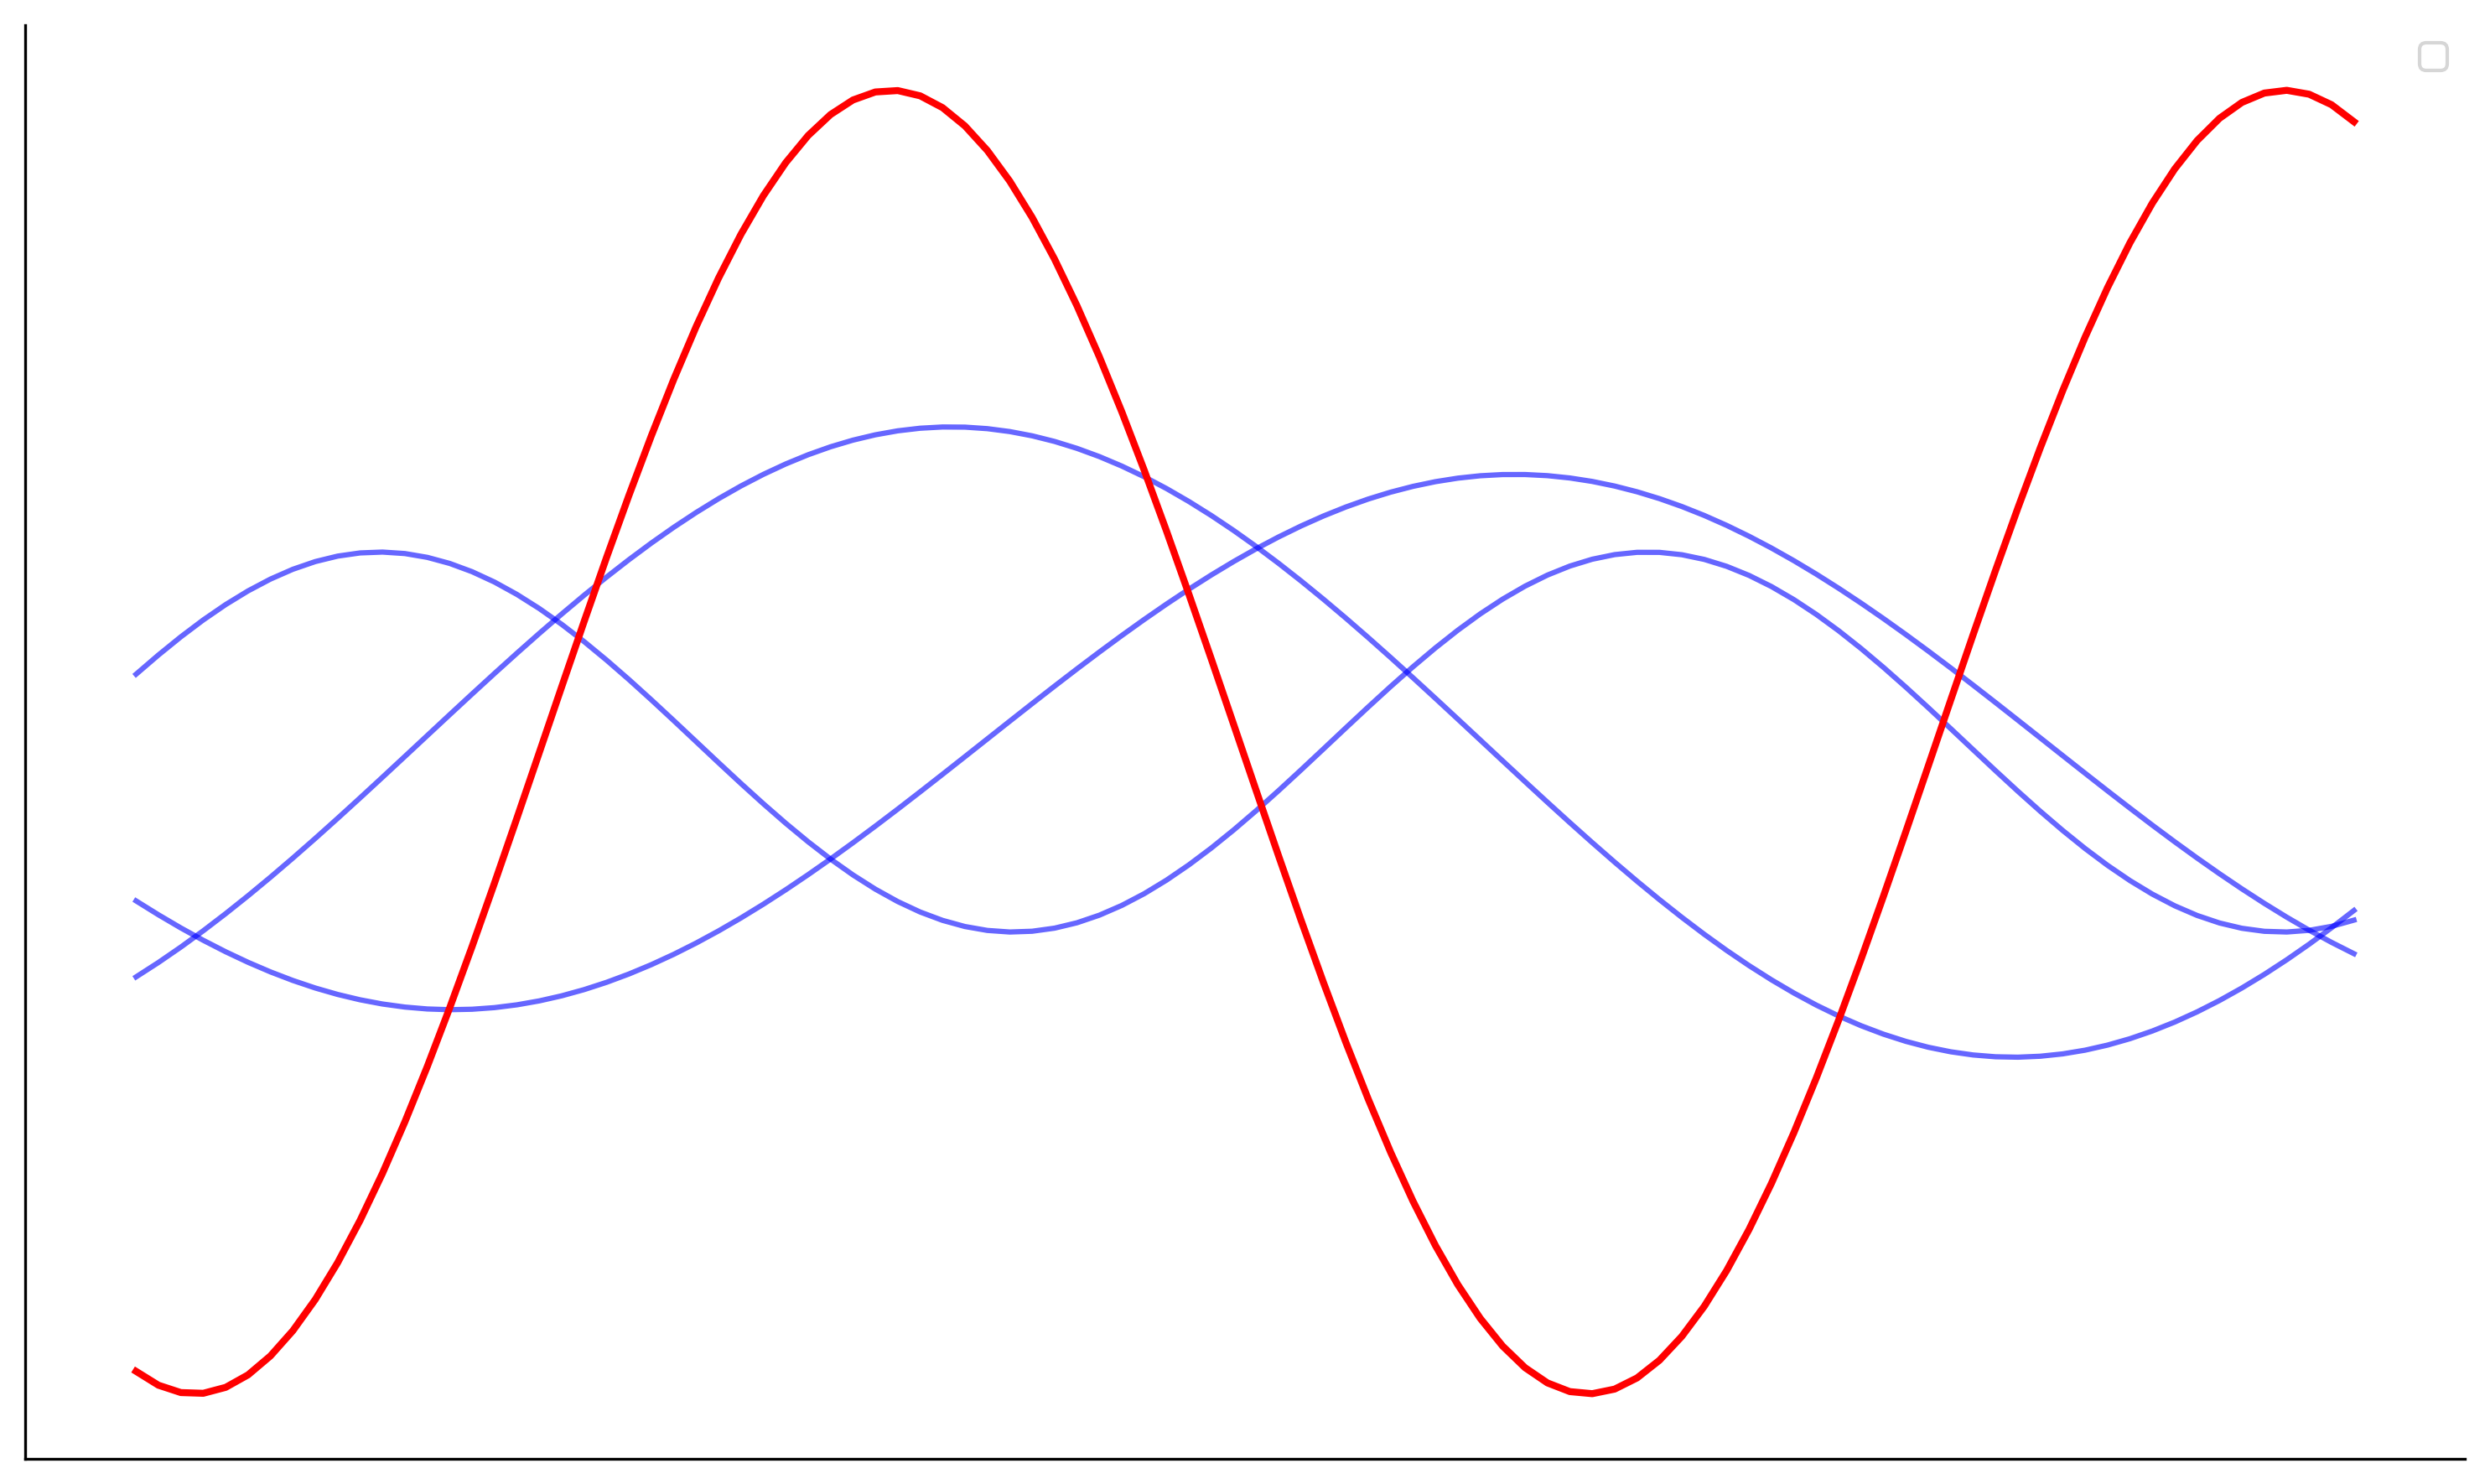

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate time values
time = np.linspace(0, 10, 100)  # Time from 0 to 10 seconds

# Generate 5 smooth random lines (using sine functions with noise)
num_lines = 3
amplitudes = np.random.uniform(0.5, 1.5, num_lines)  # Random amplitudes for blue lines
frequencies = np.random.uniform(0.5, 1.5, num_lines)  # Random frequencies for blue lines

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot the blue lines
for i in range(num_lines):
    # Each line has a different amplitude and frequency
    line = amplitudes[i] * np.sin(frequencies[i] * time + np.random.uniform(0, 2 * np.pi))
    plt.plot(time, line, color='blue', alpha=0.6)  # Add some transparency for better visualization

# Plot the red line with larger amplitude
large_amplitude = 3  # Larger amplitude for the red line
red_line = large_amplitude * np.sin(1 * time + np.random.uniform(0, 2 * np.pi))  # Higher amplitude
plt.plot(time, red_line, color='red', linewidth=2)

plt.xticks([])
plt.yticks([])
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn


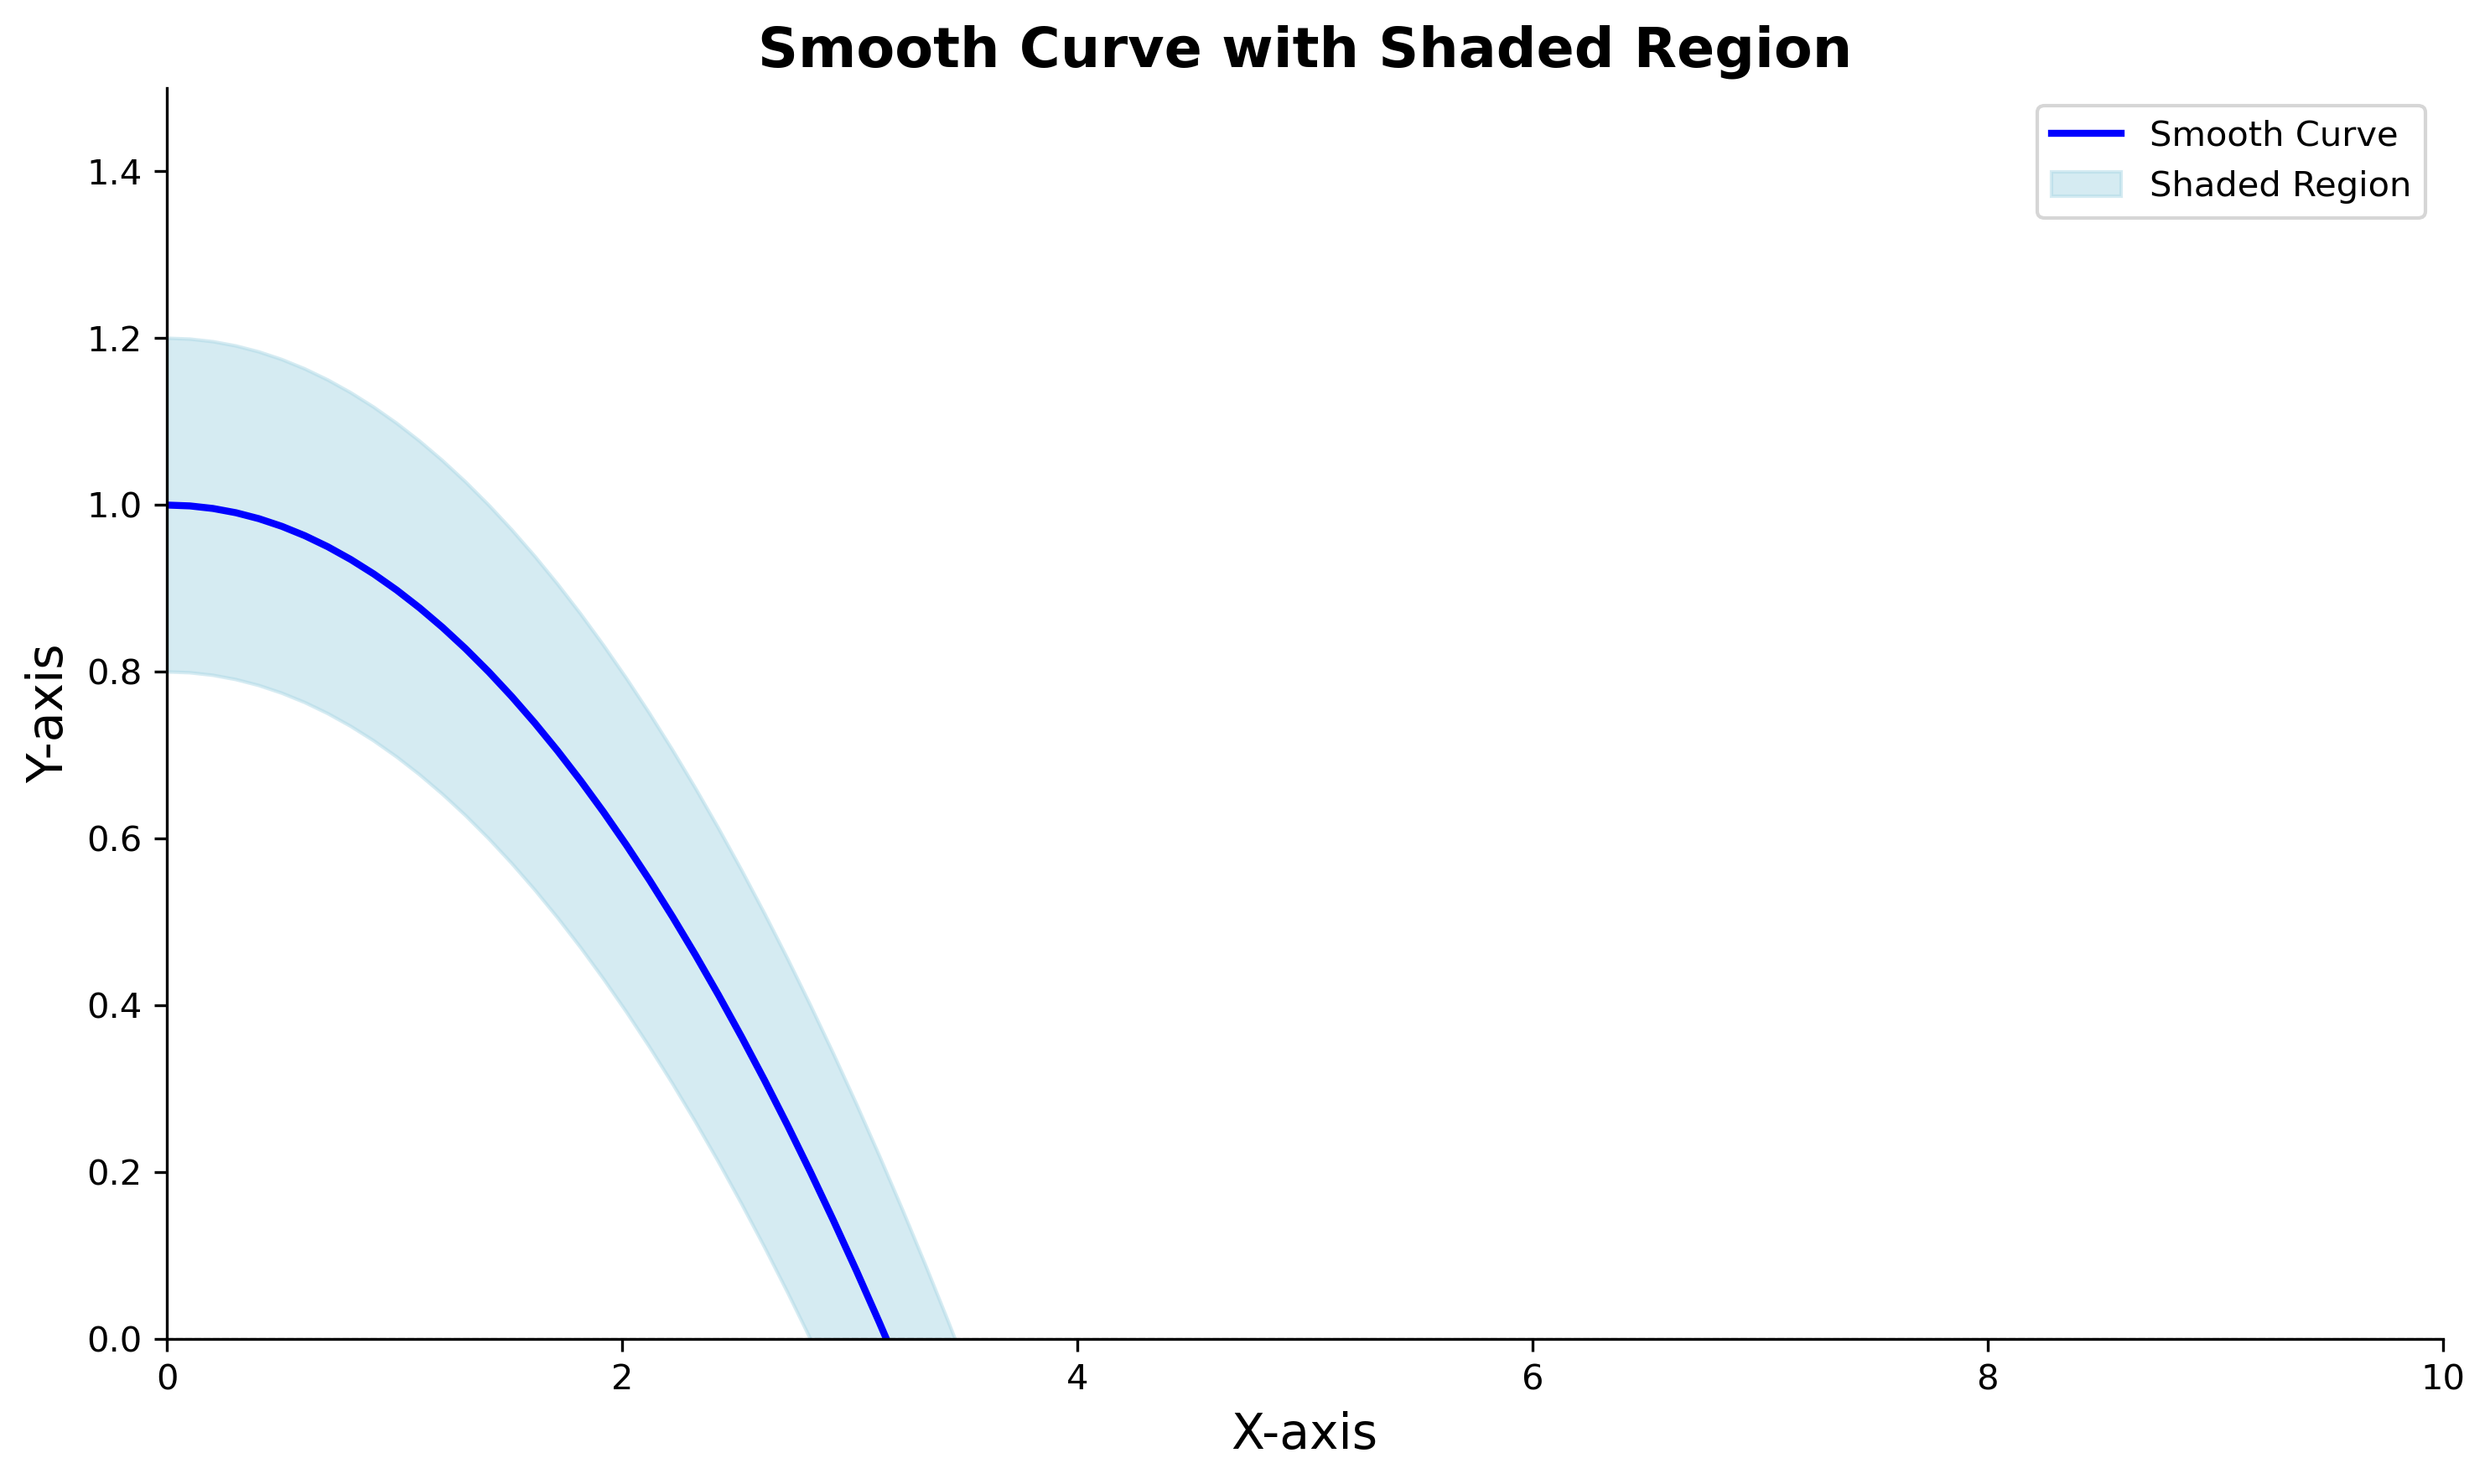

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define x values
x = np.linspace(0, 10, 100)

# Step 2: Define a smooth curve from (0, 1) to (10, 0)
# Using a quadratic function: y = -0.1*(x - 10)**2 + 1
y = -0.1 * (x) ** 2 + 1

# Step 3: Define the shaded region
# We can define an upper and lower bound for the shaded area
shaded_area_upper = y + 0.2  # Upper bound of shaded area
shaded_area_lower = y - 0.2  # Lower bound of shaded area

# Step 4: Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', linewidth=2, label='Smooth Curve')  # The main curve

# Fill the shaded area
plt.fill_between(x, shaded_area_lower, shaded_area_upper, color='lightblue', alpha=0.5, label='Shaded Region')

# Customize the plot
plt.title('Smooth Curve with Shaded Region', fontsize=16, fontweight='bold')
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.xlim(0, 10)
plt.ylim(0, 1.5)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add x-axis
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Add y-axis
plt.legend()

sns.despine()
plt.tight_layout()
plt.show()


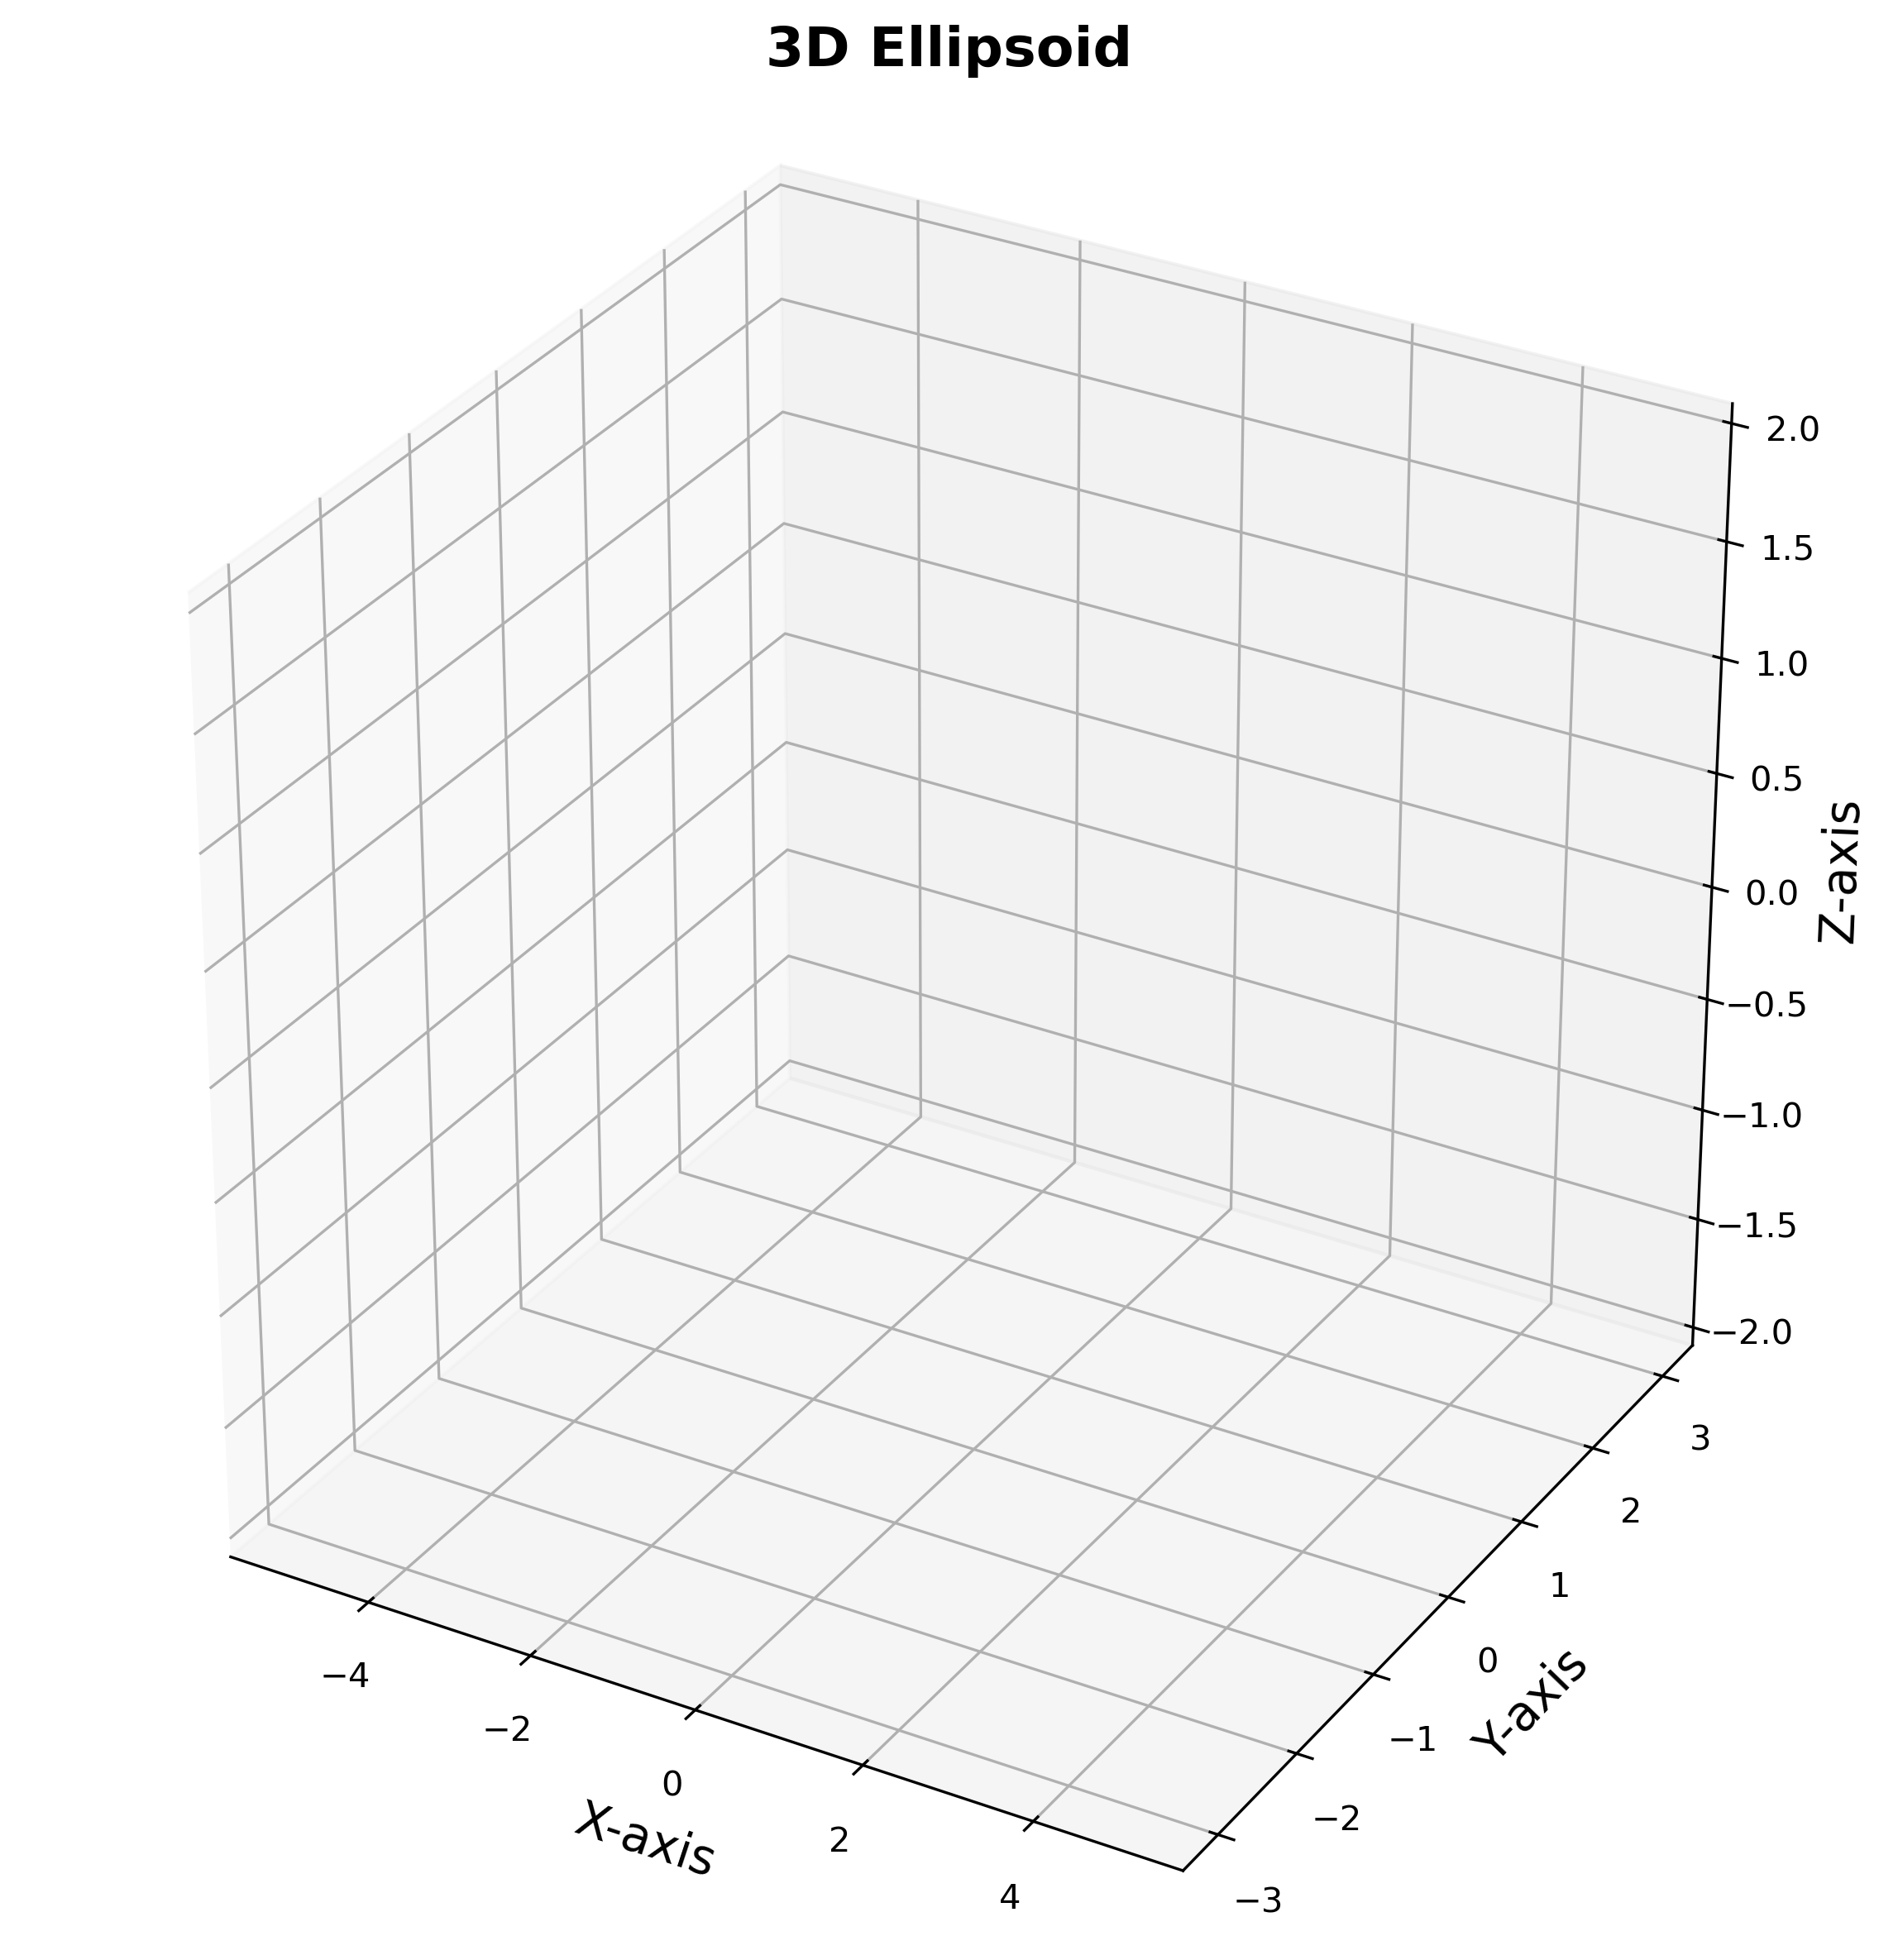

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Define the parameters of the ellipsoid
a = 5  # semi-major axis (x-direction)
b = 3  # semi-minor axis (y-direction)
c = 2  # semi-minor axis (z-direction)

# Step 2: Create a grid of angles
u = np.linspace(0, 2 * np.pi, 100)  # angle for azimuth
v = np.linspace(0, np.pi, 100)       # angle for elevation

# Step 3: Generate the Cartesian coordinates
x = a * np.outer(np.cos(u), np.sin(v))  # X-coordinates
y = b * np.outer(np.sin(u), np.sin(v))  # Y-coordinates
z = c * np.outer(np.ones(np.size(u)), np.cos(v))  # Z-coordinates

# Step 4: Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Step 5: Plot the ellipsoid
ax.plot_surface(x, y, z, color='blue', alpha=0.6, rstride=100, cstride=100)

# Customize the plot
ax.set_title('3D Ellipsoid', fontsize=16, fontweight='bold')
ax.set_xlabel('X-axis', fontsize=14)
ax.set_ylabel('Y-axis', fontsize=14)
ax.set_zlabel('Z-axis', fontsize=14)
ax.set_box_aspect([1, 1, 1])  # Aspect ratio is 1:1:1

# Show the plot
plt.tight_layout()
plt.show()
